In [66]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:90%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.text_cell_render.rendered_html{font-size:10pt;}
div.output {font-size:10pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:10pt;padding:5px;}
table.dataframe{font-size:10px;}
</style>
"""))

- 2013년이후 전국 아파트분양가격
- 공공데이터 포털에 있는 데이터를 Pandas의 melt, concat, transpose와 같은 reshape 기능을 활용해 분석
- groupby, pivot_table, info, describe, value_counts등을 통한 데이터 요약과 분석
- 이를 통해 전혀 다른 두 데이터의 정제와 병합, 수치형 데이터의 차이를 이해하고 다양한 그래프로 시각화(barplot, lineplot, scatterplot, lmplot, swarmplot, histplot)

# 1. 패키지로드 & 한글설정 & 경고메세지 ignore

In [4]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

# 시각화의 선명도를 높임
%config InlineBackend.figure_format = "retina"

# 한글설정
sns.set(style='white', rc={'figure.figsize':(12,3)})
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# 다른 폰트를 기본 폰트로 하려면
# from matplotlib.font_manager import FontProperties
# font_path = '**파일명/경로**'
# font_prop = FontProperties(fname=font_path, size=10)
# plt.rc('font', family=font_prop.get_name())
 
# warning(경고) 안보이게
warnings.filterwarnings(action='ignore')

# 2. 데이터 다운로드
- https://www.data.go.kr 에서 "아파트 분양 가격"을 검색한 csv 다운로드

## (1) 2013년9월부터 2015년8월까지 데이터는 df_first 변수에 담아 탐색

In [5]:
df_first = pd.read_csv('C:/ai/downloads/부동산/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='cp949')
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [6]:
df_first.shape

(17, 22)

In [8]:
pd.options.display.max_columns = 22 #Display 가능한 최대 열수 수정 (20→)
df_first.tail(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,7833,7724,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


In [9]:
#결측치 확인
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [10]:
df_first.isna().sum() #열별 결측치 합계 (없음 확인!)

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [12]:
df_first_heat = df_first.set_index('지역') #'지역'을 index로 세팅해 할당.
df_first_heat.sample(5)

,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
지역,,,,,,,,,,,,,,,,,,,,,
강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,6419,6631,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008
세종,7601,7600,7532,7814,7908,7934,8067,8067,8141,8282,8527,8592,8560,8560,8560,8555,8546,8546,8671,8669,8695
경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,6577,6778,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037
대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,8048,8038,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449


- color map 참조 : https://matplotlib.org/stable/users/explain/colors/colormaps.html

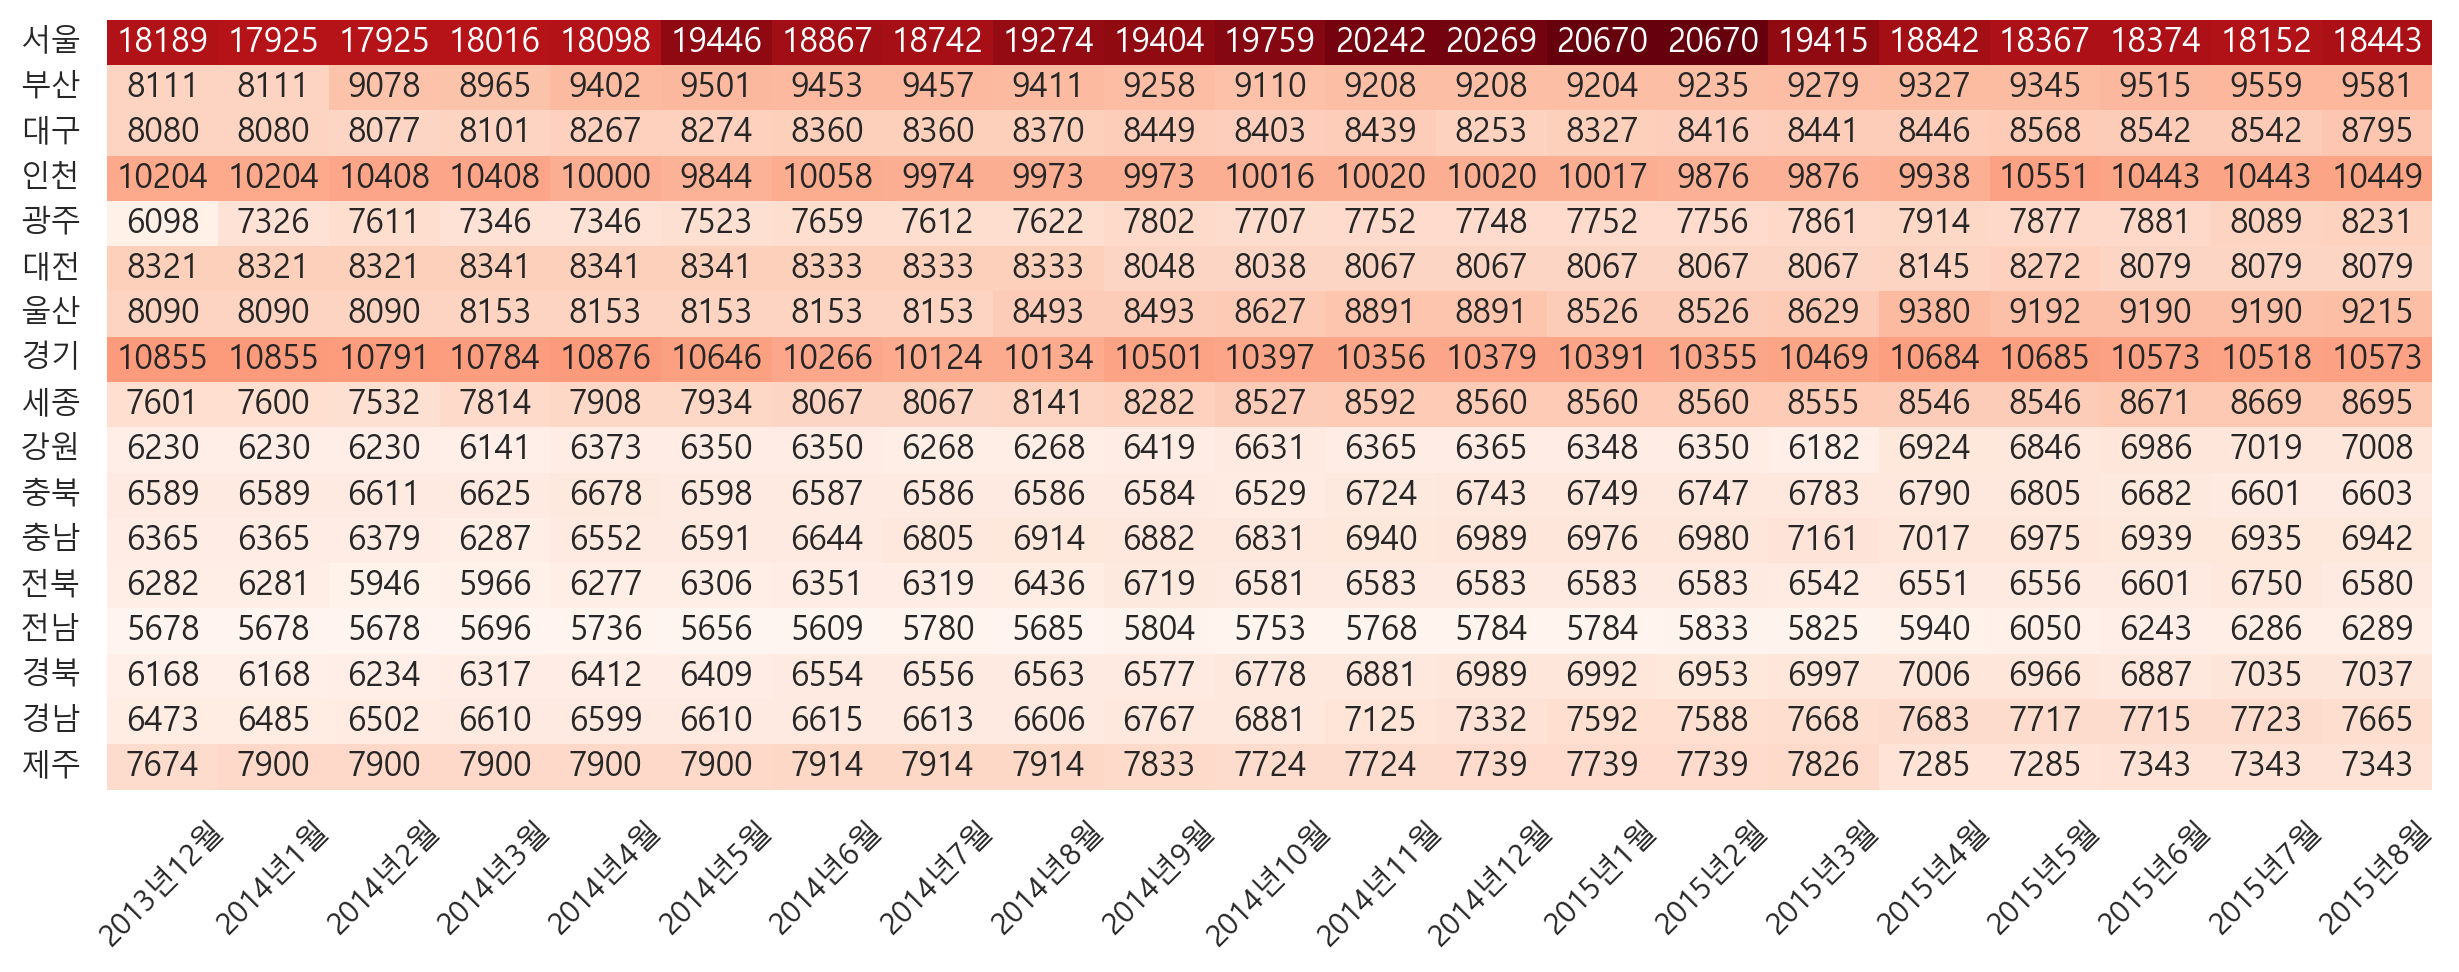

In [21]:
plt.figure(figsize=(15,5))
sns.heatmap(df_first_heat, annot=True, fmt='d', cmap='Reds', cbar=False) #'d'=decimal, annot=히트맵 내 숫자 표시
plt.xticks(rotation=45)
plt.ylabel(None) #'지역' ylabel 삭제
plt.show()

## (2) 이후 데이터는 df_last 변수에 담아 탐색

In [23]:
df_last = pd.read_csv('c:/ai/downloads/부동산/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv',
                     encoding='cp949')
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [24]:
# 데이터 요약하기
df_last.info()
# 분양가격 결측치가 많다!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         9095 non-null   object
 1   규모구분        9095 non-null   object
 2   연도          9095 non-null   int64 
 3   월           9095 non-null   int64 
 4   분양가격(제곱미터)  8481 non-null   object
dtypes: int64(2), object(3)
memory usage: 355.4+ KB


# 3. df_last의 데이터 결측치를 확인하고 대체 고민

In [25]:
# 열별 결측치 갯수
#df_last.isnull().sum()
df_last.isna().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    614
dtype: int64

In [26]:
# 열별 결측치를 제외한 갯수
#df_last.notnull().sum()
df_last.notna().sum()

지역명           9095
규모구분          9095
연도            9095
월             9095
분양가격(제곱미터)    8481
dtype: int64

In [29]:
# '분양가격(제곱미터)' 컬럼의 결측치 갯수와 결측치가 아닌 갯수, 전체 데이터 수
print('전체 데이터수: ',len(df_last['분양가격(제곱미터)']), df_last.shape[0])
print('결측치가 아닌 데이터수(notnull): ', df_last['분양가격(제곱미터)'].notnull().sum())
print('결측치가 아닌 데이터수(notna): ', df_last['분양가격(제곱미터)'].notna().sum())
print('결측치 데이터수(isnull): ', df_last['분양가격(제곱미터)'].isnull().sum())
print('결측치 데이터수(isna): ', df_last['분양가격(제곱미터)'].isna().sum())

전체 데이터수:  9095 9095
결측치가 아닌 데이터수(notnull):  8481
결측치가 아닌 데이터수(notna):  8481
결측치 데이터수(isnull):  614
결측치 데이터수(isna):  614


# 4. df_last 데이셋에 평당분양가격컬럼 추가

## (1) astype('float')나 pd.to_numeric() 사용
## (2) 6,222 => 6222 수정, space가 저장된 경우 nan으로 수정하는 함수를 apply나 map적용
## (3) df_last['분양가격(제곱미터)']*3.3

In [32]:
#결측치 처리 전 연산 에러
#df_last['분양가격(제곱미터)']*3.3 → TypeError
#문자 타입임
df_last.loc[0, '분양가격(제곱미터)']
#df_last.groupby('지역명')['분양가격(제곱미터)'].mean() #TypeError

'5841'

In [35]:
#df_last['분양가격(제곱미터)'].astype('float') #' ', ',' 에러 발생
pd.to_numeric(df_last['분양가격(제곱미터)'], #예외 발생 시 NaN으로 변경
              errors='coerce').isna().sum() #원래 결측치 갯수(614)

744

In [36]:
#분양 가격에 space가 있는 경우
df_last[df_last['분양가격(제곱미터)'].str.strip() == ''] #좌우 여백을 떼면 빈스트링인 경우

,지역명,규모구분,연도,월,분양가격(제곱미터)
28,광주,전용면적 85제곱미터초과 102제곱미터이하,2015,10,
29,광주,전용면적 102제곱미터초과,2015,10,
34,대전,전용면적 102제곱미터초과,2015,10,
81,제주,전용면적 60제곱미터이하,2015,10,
113,광주,전용면적 85제곱미터초과 102제곱미터이하,2015,11,
...,...,...,...,...,...
8833,경남,전용면적 85제곱미터초과 102제곱미터이하,2024,5,
8836,제주,전용면적 60제곱미터이하,2024,5,
8838,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,5,
8964,울산,전용면적 102제곱미터초과,2024,7,


In [39]:
#분양 가격에 comma가 있는 경우
df_last[df_last['분양가격(제곱미터)'].notnull() & 
        (df_last['분양가격(제곱미터)'].str.find(',') != -1)] #윗줄 없이 이거만으로는 NaN도 조회됨

,지역명,규모구분,연도,월,분양가격(제곱미터)
80,제주,모든면적,2015,10,"2,232"
82,제주,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"2,225"
83,제주,전용면적 85제곱미터초과 102제곱미터이하,2015,10,"2,583"
84,제주,전용면적 102제곱미터초과,2015,10,"2,574"


### apply
- apply(함수, axis) : 1차원, 2차원(axis 지정. axis기본값0)
- map(함수) : 1차원
- applymap(함수) : 2차원(모든 요소들에 함수를 적용)

In [40]:
# 콤마가 있는 문자에서 콤마 없애기 방법1
temp = '12,523'
temp.replace(',','')

'12523'

In [42]:
# 콤마가 있는 문자에서 콤마 없애기 방법2
temp = '12,523'
tempsplited=temp.split(',')
''.join(tempsplited)

'12523'

In [48]:
# 분양가격 컬럼에 콤마(,)가 있는 경우 콤마(,)를 제거('5,123' -> 5123)
# 공백문자가 있는 경우 np.nan로 바꾸는 함수
def commadrop(row):
    row = row.copy()
    price = row['분양가격(제곱미터)']
    #price(스칼라데이터)가 결측치안지 여부
        #(1) price is np.nan : 값의 타입에 상관없이 NaN인지 여부
        #(2) pd.isna(price) : 값의 타입에 상관없이 NaN인지 여부
        #(3) np.isnan(숫자데이터) : 값이 숫자가 아닐 경우 에러. 숫자일 경우 NaN인지 여부
    if price is np.nan:
        pass
    elif price.strip() == '': #공백문자(space)면 결측치로
        row['분양가격(제곱미터)'] = np.nan
    elif price.find(',') != -1: #콤마(,)가 있으면 없애고 float 형변환
        pricesplited = price.split(',')
        row['분양가격(제곱미터)'] = float(''.join(pricesplited))
    else:
        row['분양가격(제곱미터)'] = float(price)
    return row

commadrop(df_last.loc[80]) # 콤마 제외
commadrop(df_last.loc[1]) # 그대로
commadrop(df_last.loc[28]) # 공백문자의 경우 nan
commadrop(df_last.loc[368]) # nan의 경우 nan

지역명                                광주
규모구분          전용면적 85제곱미터초과 102제곱미터이하
연도                               2016
월                                   2
분양가격(제곱미터)                        NaN
Name: 368, dtype: object

In [53]:
# 공백문자는 결측치로, 콤마는 제거하기를 모든 행에 적용
df_last.apply(commadrop, axis=1)

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841.0
1,서울,전용면적 60제곱미터이하,2015,10,5652.0
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0
4,서울,전용면적 102제곱미터초과,2015,10,5879.0
...,...,...,...,...,...
9090,제주,모든면적,2024,8,7703.0
9091,제주,전용면적 60제곱미터이하,2024,8,NaN
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,7515.0
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN


### map

In [56]:
# 결측치->결측치 return, 공백문자->결측치 return, '3,198' -> 3198 return, '3198'->3198 return,  
def commadrop2(price):
    if pd.isna(price):
        return np.nan
    elif price.strip() == '':
        return np.nan
    elif price.find(',') != -1: # == -1 는 '없어'라는 의미
        return float(''.join(price.split(',')))
    else:
        return float(price)

print(commadrop2(df_last.loc[80, '분양가격(제곱미터)'])) # 콤마제외한 문자를 숫자로 
print(commadrop2(df_last.loc[1, '분양가격(제곱미터)'])) # 콤마없는 문자를 숫자로 
print(commadrop2(df_last.loc[28, '분양가격(제곱미터)'])) # 공백문자를 nan
print(commadrop2(df_last.loc[368, '분양가격(제곱미터)'])) # nan을 nan

2232.0
5652.0
nan
nan


- apply(함수, axis) : 1차원, 2차원(axis 지정. axis기본값0)
- map(함수) : 1차원
- applymap(함수) : 2차원(모든 요소들에 함수를 적용)

In [58]:
#df_last['분양가격(제곱미터)'].apply(commadrop2)
df_last['분양가격(제곱미터)'].map(commadrop2)

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
9090    7703.0
9091       NaN
9092    7515.0
9093       NaN
9094    7950.0
Name: 분양가격(제곱미터), Length: 9095, dtype: float64

### apply나 map사용 안 하기

In [60]:
pd.to_numeric(df_last['분양가격(제곱미터)'].str.strip().str.replace(',','')).isna().sum()
#replace 앞에 str.꼭 넣어야 문자열 함수로 작용.

740

In [61]:
df_last['분양가격(제곱미터)'] = pd.to_numeric(df_last['분양가격(제곱미터)'].str.strip().str.replace(',',''))
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841.0
1,서울,전용면적 60제곱미터이하,2015,10,5652.0
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0
4,서울,전용면적 102제곱미터초과,2015,10,5879.0


In [64]:
print(type(df_last.loc[80, '분양가격(제곱미터)']), df_last.loc[80, '분양가격(제곱미터)']) # 콤마제외한 문자를 숫자로 
print(type(df_last.loc[1, '분양가격(제곱미터)']), df_last.loc[1, '분양가격(제곱미터)']) # 콤마없는 문자를 숫자로 
print(type(df_last.loc[28, '분양가격(제곱미터)']), df_last.loc[28, '분양가격(제곱미터)']) # 공백문자를 nan
print(type(df_last.loc[368, '분양가격(제곱미터)']), df_last.loc[368, '분양가격(제곱미터)']) # nan을 nan

<class 'numpy.float64'> 2232.0
<class 'numpy.float64'> 5652.0
<class 'numpy.float64'> nan
<class 'numpy.float64'> nan


In [65]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         9095 non-null   object 
 1   규모구분        9095 non-null   object 
 2   연도          9095 non-null   int64  
 3   월           9095 non-null   int64  
 4   분양가격(제곱미터)  8355 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 355.4+ KB


In [67]:
#평당 분양가격 필드 생성
df_last['평당분양가격'] = df_last['분양가격(제곱미터)']*3.3
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         9095 non-null   object 
 1   규모구분        9095 non-null   object 
 2   연도          9095 non-null   int64  
 3   월           9095 non-null   int64  
 4   분양가격(제곱미터)  8355 non-null   float64
 5   평당분양가격      8355 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 426.5+ KB


In [69]:
df_last['평당분양가격'].describe()

count     8355.000000
mean     13032.995512
std       5729.523419
min       6164.400000
25%       9038.700000
50%      11513.700000
75%      15034.800000
max      61917.900000
Name: 평당분양가격, dtype: float64

# 5. df_last 데이터셋에서 전용면적 컬럼을 추가한다
- 전용면적 컬럼, 필요없는 컬럼 처리로 메모리 절약

In [70]:
df_last['규모구분'].unique()

array(['모든면적', '전용면적 60제곱미터이하', '전용면적 60제곱미터초과 85제곱미터이하',
       '전용면적 85제곱미터초과 102제곱미터이하', '전용면적 102제곱미터초과'], dtype=object)

In [73]:
#'전용면적 85제곱미터초과 102제곱미터이하' → ²(alt+0178), 초과 >~, 미만 <~
x = '전용면적 85제곱미터초과 102제곱미터이하'
#x.replace('전용면적','').replace('이하','') ...
import re
re.sub('전용면적|이하| ', '', x).replace('제곱미터', 'm²').replace('초과','~')

'85m²~102m²'

In [77]:
#방법 1. 정규표현식 + 람다식 + apply
df_last['전용면적'] = df_last['규모구분'].apply(lambda x : re.sub('전용면적|이하| ', '', x).replace('제곱미터', 'm²').replace('초과','~'))
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격,전용면적
0,서울,모든면적,2015,10,5841.0,19275.3,모든면적
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6,60m²
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6,60m²~85m²
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3,85m²~102m²
4,서울,전용면적 102제곱미터초과,2015,10,5879.0,19400.7,102m²~


In [ ]:
#방법 2. 일일이 (굳이?)
df_last['전용면적'] = df_last['규모구분'].apply(lambda x : x.replace('제곱미터', 'm²')
df_last['전용면적'] = df_last['규모구분'].apply(lambda x : x.replace('초과','~'))
df_last['전용면적'] = df_last['규모구분'].apply(lambda x : x.replace('전용면적', ''))
df_last['전용면적'] = df_last['규모구분'].apply(lambda x : x.replace('이하', ''))                                        
df_last['전용면적'] = df_last['규모구분'].apply(lambda x : x.replace(' ', ''))                                        

In [ ]:
#방법 3. replace만
df_last['전용면적'] = df_last['규모구분'].str.replace('전용면적', '')\
                                        .str.replace('이하', '')\
                                        .str.replace(' ', '')\
                                        .str.replace('제곱미터', 'm²')\
                                        .str.replace('초과','~'))

In [78]:
df_last['전용면적'].unique()

array(['모든면적', '60m²', '60m²~85m²', '85m²~102m²', '102m²~'], dtype=object)

# 6. 메모리 사용량을 줄이기 위해 불필요한 컬럼 제거

In [79]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         9095 non-null   object 
 1   규모구분        9095 non-null   object 
 2   연도          9095 non-null   int64  
 3   월           9095 non-null   int64  
 4   분양가격(제곱미터)  8355 non-null   float64
 5   평당분양가격      8355 non-null   float64
 6   전용면적        9095 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 497.5+ KB


In [81]:
df_last.drop(['규모구분', '분양가격(제곱미터)'], axis=1, inplace=True) #열 제거
df_last

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,모든면적
1,서울,2015,10,18651.6,60m²
2,서울,2015,10,19410.6,60m²~85m²
3,서울,2015,10,18879.3,85m²~102m²
4,서울,2015,10,19400.7,102m²~
...,...,...,...,...,...
9090,제주,2024,8,25419.9,모든면적
9091,제주,2024,8,NaN,60m²
9092,제주,2024,8,24799.5,60m²~85m²
9093,제주,2024,8,NaN,85m²~102m²


In [82]:
df_last.info() #memory usage 거의 30% 줄었음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     9095 non-null   object 
 1   연도      9095 non-null   int64  
 2   월       9095 non-null   int64  
 3   평당분양가격  8355 non-null   float64
 4   전용면적    9095 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 355.4+ KB


In [84]:
#컬럼 순서 정리
#df_last = df_last[['지역명','전용면적','연도','월','평당분양가격']]
col = df_last.pop('전용면적') #전용면적 열 빼서 col 변수 할당
df_last.insert(1, '전용면적', col) #원하는 위치에 col 변수 삽입
df_last.head()

,지역명,전용면적,연도,월,평당분양가격
0,서울,모든면적,2015,10,19275.3
1,서울,60m²,2015,10,18651.6
2,서울,60m²~85m²,2015,10,19410.6
3,서울,85m²~102m²,2015,10,18879.3
4,서울,102m²~,2015,10,19400.7


In [85]:
df_last.to_csv('data/df_last.csv', index=False) # 전처리 단계 백업

# 7. 데이터 집계
- GroupBy(unstack()함수 이용) vs. pivot_table()
- 우선 결측치 대체전 데이터 집계와 시각화를 할 예정

In [ ]:
df_last = pd.read_csv('data/df_last.csv') #load from backup

- df_last.groupby(["인덱스로사용할컬럼명"])["계산할컬럼명"].연산함수()
- df_last.pivot_table(index=["인덱스로사용할컬럼명"],
                    values=["계산할컬럼명"],
                    aggfunc="연산함수명")
- pd.pivot_table(df_last, index=["인덱스로사용할컬럼명"],
                    values=["계산할컬럼명"],
                    aggfunc="연산함수명")

## (1) 지역별 데이터수

In [91]:
df_last['지역명'].value_counts()

서울    535
강원    535
경남    535
경북    535
전남    535
전북    535
충남    535
충북    535
세종    535
인천    535
울산    535
대전    535
광주    535
대구    535
부산    535
경기    535
제주    535
Name: 지역명, dtype: int64

In [93]:
#지역명별 데이터 행 개수 (결측치 제외) : 결과 1차원 시리즈 - groupby
df_last.groupby(['지역명'])['평당분양가격'].count().sort_values(ascending=False)

지역명
경기    535
충북    533
부산    533
인천    531
서울    527
강원    523
전북    520
경남    516
충남    516
경북    511
전남    507
대구    495
광주    450
제주    439
대전    415
세종    409
울산    395
Name: 평당분양가격, dtype: int64

In [99]:
#지역명별 데이터 행 개수 (결측치 제외) : 결과 2차원 데이터프레임 - groupby

#1.2차원으로 groupby
df_last.groupby(['지역명'])[['평당분양가격']].count().sort_values(
    by='평당분양가격', ascending=False)

#2.1차원으로 groupby 후 to_frame
df_last.groupby(['지역명'])['평당분양가격'].count().sort_values(
    ascending=False).to_frame()

#3.1차원에서 인덱스 떼서 2차원 만들기 ==#4
df_last.groupby(['지역명'])['평당분양가격'].count().reset_index().sort_values(
    by='평당분양가격', ascending=False)

#4.1차원에서 인덱스 떼서 2차원 만들기 ==#3
df_last.groupby(['지역명'], as_index=False)['평당분양가격'].count().sort_values(
    by='평당분양가격', ascending=False)

,지역명,평당분양가격
1,경기,535
16,충북,533
7,부산,533
11,인천,531
8,서울,527
0,강원,523
13,전북,520
2,경남,516
15,충남,516
3,경북,511


In [100]:
#5.cf. #1을 와이드폼으로
df_last.groupby(['지역명'])[['평당분양가격']].count().sort_values(by='평당분양가격', ascending=False).T

지역명,경기,충북,부산,인천,서울,강원,전북,경남,충남,경북,전남,대구,광주,제주,대전,세종,울산
평당분양가격,535,533,533,531,527,523,520,516,516,511,507,495,450,439,415,409,395


In [101]:
#지역명별 데이터 행 개수 (결측치 제외) : 결과 2차원 데이터프레임 - pivot_table
#1.
df_last.pivot_table(index=['지역명'], 
                    values='평당분양가격', 
                    aggfunc='count').T
#2.
pd.pivot_table(df_last, index=['지역명'], 
               values='평당분양가격', 
               aggfunc='count').transpose()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
평당분양가격,523,535,516,511,450,495,415,533,527,409,395,531,507,520,439,516,533


## (2) 지역별 평당분양가격(평균, 최대값, ... 요약통계량)

In [127]:
#지역명별 평당분양가격 최대값 #1
df_last.groupby(['지역명'])[['평당분양가격']].max().sort_values(by='평당분양가격', ascending=False).T

지역명,서울,인천,부산,대전,대구,울산,제주,광주,경기,세종,강원,경남,경북,전남,충남,전북,충북
평당분양가격,61917.9,54723.9,31904.4,30851.7,30600.9,27815.7,27753.0,24951.3,24172.5,21087.0,17806.8,16566.0,15345.0,15087.6,14932.5,14774.1,13685.1


In [129]:
#지역명별 평당분양가격 평균 #1
df_last.groupby(['지역명'])[['평당분양가격']].mean().sort_values(by='평당분양가격', ascending=False).T

지역명,서울,제주,경기,부산,인천,대구,울산,광주,대전,경남,세종,경북,강원,충남,전남,충북,전북
평당분양가격,27755.404554,15912.434624,15420.03028,14896.949156,14513.232203,14434.52,13958.197975,12998.216,12829.56506,10776.955814,10741.830807,10261.553425,10078.7174,9769.541279,9224.326627,8896.583302,8886.201923


In [140]:
#지역명별 평당분양가격 통계요약정보(describe) #1
#_1
df_last.groupby(['지역명'])['평당분양가격'].describe().applymap(
    lambda x : round(x, 1)).T
#_2
df_last.groupby(['지역명'])['평당분양가격'].describe().round(1).T

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
count,523.0,535.0,516.0,511.0,450.0,495.0,415.0,533.0,527.0,409.0,395.0,531.0,507.0,520.0,439.0,516.0,533.0
mean,10078.7,15420.0,10777.0,10261.6,12998.2,14434.5,12829.6,14896.9,27755.4,10741.8,13958.2,14513.2,9224.3,8886.2,15912.4,9769.5,8896.6
std,2828.9,3245.9,2223.6,2276.0,3637.6,3407.3,4191.7,4059.9,6566.4,1638.8,4060.2,3999.9,2092.0,1660.7,6039.0,2000.6,1769.5
min,6639.6,10160.7,7260.0,6949.8,7428.3,8259.9,8002.5,9669.0,16701.3,8487.6,7992.6,9537.0,6289.8,6270.0,7342.5,6926.7,6164.4
25%,7652.7,13274.2,9187.2,8378.7,9554.3,11949.3,9401.7,12467.4,22497.8,9101.4,10312.5,11398.2,7613.1,7661.8,10645.8,8141.1,7543.8
50%,9428.1,14652.0,10254.8,9705.3,12673.6,14711.4,11820.6,13411.2,26763.0,10523.7,13827.0,14652.0,8669.1,8679.0,13500.3,9124.5,8596.5
75%,11873.4,17168.2,12031.8,12500.4,15213.0,16338.3,15310.4,17301.9,31054.6,12266.1,17602.2,16214.6,10627.6,9986.6,21908.7,11740.6,9906.6
max,17806.8,24172.5,16566.0,15345.0,24951.3,30600.9,30851.7,31904.4,61917.9,21087.0,27815.7,54723.9,15087.6,14774.1,27753.0,14932.5,13685.1


In [128]:
#지역명별 평당분양가격 최대값 #2
df_last.pivot_table(index=['지역명'], values=['평당분양가격'], aggfunc='max').sort_values(by='평당분양가격', ascending=False).T
pd.pivot_table(df_last, index=['지역명'], values=['평당분양가격'], aggfunc='max').sort_values(by='평당분양가격', ascending=False).T

지역명,서울,인천,부산,대전,대구,울산,제주,광주,경기,세종,강원,경남,경북,전남,충남,전북,충북
평당분양가격,61917.9,54723.9,31904.4,30851.7,30600.9,27815.7,27753.0,24951.3,24172.5,21087.0,17806.8,16566.0,15345.0,15087.6,14932.5,14774.1,13685.1


In [142]:
#지역명별 평당분양가격 평균 #2
df_last.pivot_table(index=['지역명'], values=['평당분양가격'], aggfunc='mean').sort_values(by='평당분양가격', ascending=False).T
pd.pivot_table(df_last, index=['지역명'], values=['평당분양가격'], aggfunc='mean').sort_values(by='평당분양가격', ascending=False).T

지역명,서울,제주,경기,부산,인천,대구,울산,광주,대전,경남,세종,경북,강원,충남,전남,충북,전북
평당분양가격,27755.404554,15912.434624,15420.03028,14896.949156,14513.232203,14434.52,13958.197975,12998.216,12829.56506,10776.955814,10741.830807,10261.553425,10078.7174,9769.541279,9224.326627,8896.583302,8886.201923


In [141]:
#지역명별 평당분양가격 describe #2
df_last.pivot_table(index=['지역명'], values='평당분양가격', aggfunc='describe').round(1).T
pd.pivot_table(df_last, index=['지역명'], values='평당분양가격', aggfunc='describe').round(1).T

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
25%,7652.7,13274.2,9187.2,8378.7,9554.3,11949.3,9401.7,12467.4,22497.8,9101.4,10312.5,11398.2,7613.1,7661.8,10645.8,8141.1,7543.8
50%,9428.1,14652.0,10254.8,9705.3,12673.6,14711.4,11820.6,13411.2,26763.0,10523.7,13827.0,14652.0,8669.1,8679.0,13500.3,9124.5,8596.5
75%,11873.4,17168.2,12031.8,12500.4,15213.0,16338.3,15310.4,17301.9,31054.6,12266.1,17602.2,16214.6,10627.6,9986.6,21908.7,11740.6,9906.6
count,523.0,535.0,516.0,511.0,450.0,495.0,415.0,533.0,527.0,409.0,395.0,531.0,507.0,520.0,439.0,516.0,533.0
max,17806.8,24172.5,16566.0,15345.0,24951.3,30600.9,30851.7,31904.4,61917.9,21087.0,27815.7,54723.9,15087.6,14774.1,27753.0,14932.5,13685.1
mean,10078.7,15420.0,10777.0,10261.6,12998.2,14434.5,12829.6,14896.9,27755.4,10741.8,13958.2,14513.2,9224.3,8886.2,15912.4,9769.5,8896.6
min,6639.6,10160.7,7260.0,6949.8,7428.3,8259.9,8002.5,9669.0,16701.3,8487.6,7992.6,9537.0,6289.8,6270.0,7342.5,6926.7,6164.4
std,2828.9,3245.9,2223.6,2276.0,3637.6,3407.3,4191.7,4059.9,6566.4,1638.8,4060.2,3999.9,2092.0,1660.7,6039.0,2000.6,1769.5


In [150]:
r = df_last.pivot_table(index=['지역명'], values=['평당분양가격'], aggfunc='describe').round(1)
r.columns = r.columns.droplevel(0)
r.T

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
25%,7652.7,13274.2,9187.2,8378.7,9554.3,11949.3,9401.7,12467.4,22497.8,9101.4,10312.5,11398.2,7613.1,7661.8,10645.8,8141.1,7543.8
50%,9428.1,14652.0,10254.8,9705.3,12673.6,14711.4,11820.6,13411.2,26763.0,10523.7,13827.0,14652.0,8669.1,8679.0,13500.3,9124.5,8596.5
75%,11873.4,17168.2,12031.8,12500.4,15213.0,16338.3,15310.4,17301.9,31054.6,12266.1,17602.2,16214.6,10627.6,9986.6,21908.7,11740.6,9906.6
count,523.0,535.0,516.0,511.0,450.0,495.0,415.0,533.0,527.0,409.0,395.0,531.0,507.0,520.0,439.0,516.0,533.0
max,17806.8,24172.5,16566.0,15345.0,24951.3,30600.9,30851.7,31904.4,61917.9,21087.0,27815.7,54723.9,15087.6,14774.1,27753.0,14932.5,13685.1
mean,10078.7,15420.0,10777.0,10261.6,12998.2,14434.5,12829.6,14896.9,27755.4,10741.8,13958.2,14513.2,9224.3,8886.2,15912.4,9769.5,8896.6
min,6639.6,10160.7,7260.0,6949.8,7428.3,8259.9,8002.5,9669.0,16701.3,8487.6,7992.6,9537.0,6289.8,6270.0,7342.5,6926.7,6164.4
std,2828.9,3245.9,2223.6,2276.0,3637.6,3407.3,4191.7,4059.9,6566.4,1638.8,4060.2,3999.9,2092.0,1660.7,6039.0,2000.6,1769.5


## (3) 전용면적별 평당분양가격(평균)

In [147]:
#전용면적별 평당분양가격 평균 #1
df_last.groupby(['전용면적'])[['평당분양가격']].mean().round(1).sort_values(by='평당분양가격', ascending=False).T

전용면적,102m²~,85m²~102m²,모든면적,60m²~85m²,60m²
평당분양가격,14066.8,13447.7,12654.1,12619.0,12522.8


In [148]:
#전용면적별 평당분양가격 평균 #2
df_last.pivot_table(index=['전용면적'], values=['평당분양가격'], aggfunc='mean').round(1).sort_values(by='평당분양가격', ascending=False).T

전용면적,102m²~,85m²~102m²,모든면적,60m²~85m²,60m²
평당분양가격,14066.8,13447.7,12654.1,12619.0,12522.8


## (4) 지역별, 전용면적별 평당분양가격(평균)

In [175]:
#지역별 전용면적별 평당분양가격 평균 #1-1 1차원
r = df_last.groupby(['지역명', '전용면적'])['평당분양가격'].mean().round(1)
# series with 2-level index
print(r['서울','모든면적'], '\n')
print(r['서울'], '\n')
print(r[:,'85m²~102m²'])

26829.7 

전용면적
102m²~        29035.9
60m²          27371.2
60m²~85m²     26662.6
85m²~102m²    28972.2
모든면적          26829.7
Name: 평당분양가격, dtype: float64 

지역명
강원    10795.5
경기    15739.9
경남    12150.6
경북    10968.3
광주    12291.7
대구    13713.9
대전    13002.6
부산    14801.0
서울    28972.2
세종    10600.0
울산    15303.8
인천    14742.0
전남     8807.8
전북     9169.8
제주    14679.5
충남    10818.8
충북     9418.4
Name: 평당분양가격, dtype: float64


In [180]:
#지역별 전용면적별 평당분양가격 평균 #1-2 df
r2 = df_last.groupby(['지역명', '전용면적'])[['평당분양가격']].mean().round(1)
print(r2.loc['서울','모든면적'], '\n')
print(r2.loc['서울'], '\n')
#print(r2.loc[:,'모든면적']) #KeyError!
print(r2.xs(key='모든면적',level='전용면적')) #cross-section 함수(시리즈/DF). 레벨과 key 맞춰 access

평당분양가격    26829.7
Name: (서울, 모든면적), dtype: float64 

             평당분양가격
전용면적               
102m²~      29035.9
60m²        27371.2
60m²~85m²   26662.6
85m²~102m²  28972.2
모든면적        26829.7 

      평당분양가격
지역명         
강원    9538.3
경기   14722.8
경남   10146.5
경북    9856.6
광주   12798.4
대구   14516.5
대전   11947.6
부산   14764.5
서울   26829.7
세종   10841.0
울산   13470.8
인천   13896.8
전남    8970.5
전북    8662.3
제주   16338.9
충남    9153.6
충북    8548.0


In [188]:
# unstack() : level0(지역명) index는 그대로 두고 level1(전용면적)을 컬럼으로
df_last.groupby(['전용면적', '지역명'])[['평당분양가격']].mean().round(1).unstack()

평당분양가격                                                        \
지역명              강원       경기       경남       경북       광주       대구       대전   
전용면적                                                                        
102m²~      11314.8  16559.1  11522.5  11060.6  14749.2  15564.0  17662.0   
60m²         9441.9  15291.2  10122.2   9731.9  12254.0  13748.4  11834.2   
60m²~85m²    9383.5  14787.2  10107.8   9828.3  12656.0  14494.4  11920.1   
85m²~102m²  10795.5  15739.9  12150.6  10968.3  12291.7  13713.9  13002.6   
모든면적         9538.3  14722.8  10146.5   9856.6  12798.4  14516.5  11947.6   

                                                                          \
지역명              부산       서울       세종       울산       인천       전남      전북   
전용면적                                                                       
102m²~      15741.4  29035.9  10684.5  14809.0  16266.6  10206.9  9448.1   
60m²        14448.6  27371.2  10776.5  13624.1  13847.1   9104.6  8531.1   
60m²~85m²   14745.0  26662.6  10775.3  13520.4  13879.2   8928.4  8623.8   
85m²~102m²  14801.0  28972.2  10600.0  15303.8  14742.0   8807.8  9169.8   
모든면적        14764.5  26829.7  10841.0  13470.8  13896.8   8970.5  8662.3   

                                      
지역명              제주       충남      충북  
전용면적                                  
102m²~      16770.9  10379.4  9369.5  
60m²        14971.0   9231.1  8598.2  
60m²~85m²   16070.6   9418.3  8558.5  
85m²~102m²  14679.5  10818.8  9418.4  
모든면적        16338.9   9153.6  8548.0

In [190]:
#지역별 전용면적별 평당분양가격 평균 #2
df_last.pivot_table(index=['전용면적', '지역명'], values=['평당분양가격'], aggfunc='mean').round(1).unstack()

평당분양가격                                                        \
지역명              강원       경기       경남       경북       광주       대구       대전   
전용면적                                                                        
102m²~      11314.8  16559.1  11522.5  11060.6  14749.2  15564.0  17662.0   
60m²         9441.9  15291.2  10122.2   9731.9  12254.0  13748.4  11834.2   
60m²~85m²    9383.5  14787.2  10107.8   9828.3  12656.0  14494.4  11920.1   
85m²~102m²  10795.5  15739.9  12150.6  10968.3  12291.7  13713.9  13002.6   
모든면적         9538.3  14722.8  10146.5   9856.6  12798.4  14516.5  11947.6   

                                                                          \
지역명              부산       서울       세종       울산       인천       전남      전북   
전용면적                                                                       
102m²~      15741.4  29035.9  10684.5  14809.0  16266.6  10206.9  9448.1   
60m²        14448.6  27371.2  10776.5  13624.1  13847.1   9104.6  8531.1   
60m²~85m²   14745.0  26662.6  10775.3  13520.4  13879.2   8928.4  8623.8   
85m²~102m²  14801.0  28972.2  10600.0  15303.8  14742.0   8807.8  9169.8   
모든면적        14764.5  26829.7  10841.0  13470.8  13896.8   8970.5  8662.3   

                                      
지역명              제주       충남      충북  
전용면적                                  
102m²~      16770.9  10379.4  9369.5  
60m²        14971.0   9231.1  8598.2  
60m²~85m²   16070.6   9418.3  8558.5  
85m²~102m²  14679.5  10818.8  9418.4  
모든면적        16338.9   9153.6  8548.0

In [196]:
r = df_last.pivot_table(index='지역명', 
                        columns='전용면적',
                        values='평당분양가격', 
                        #aggfunc='mean' #기본값이라 생략 가능
                       ).round(1)
r = r[['60m²','60m²~85m²','85m²~102m²','102m²~','모든면적']]
r.head(5)

전용면적,60m²,60m²~85m²,85m²~102m²,102m²~,모든면적
지역명,,,,,
강원,9441.9,9383.5,10795.5,11314.8,9538.3
경기,15291.2,14787.2,15739.9,16559.1,14722.8
경남,10122.2,10107.8,12150.6,11522.5,10146.5
경북,9731.9,9828.3,10968.3,11060.6,9856.6
광주,12254.0,12656.0,12291.7,14749.2,12798.4


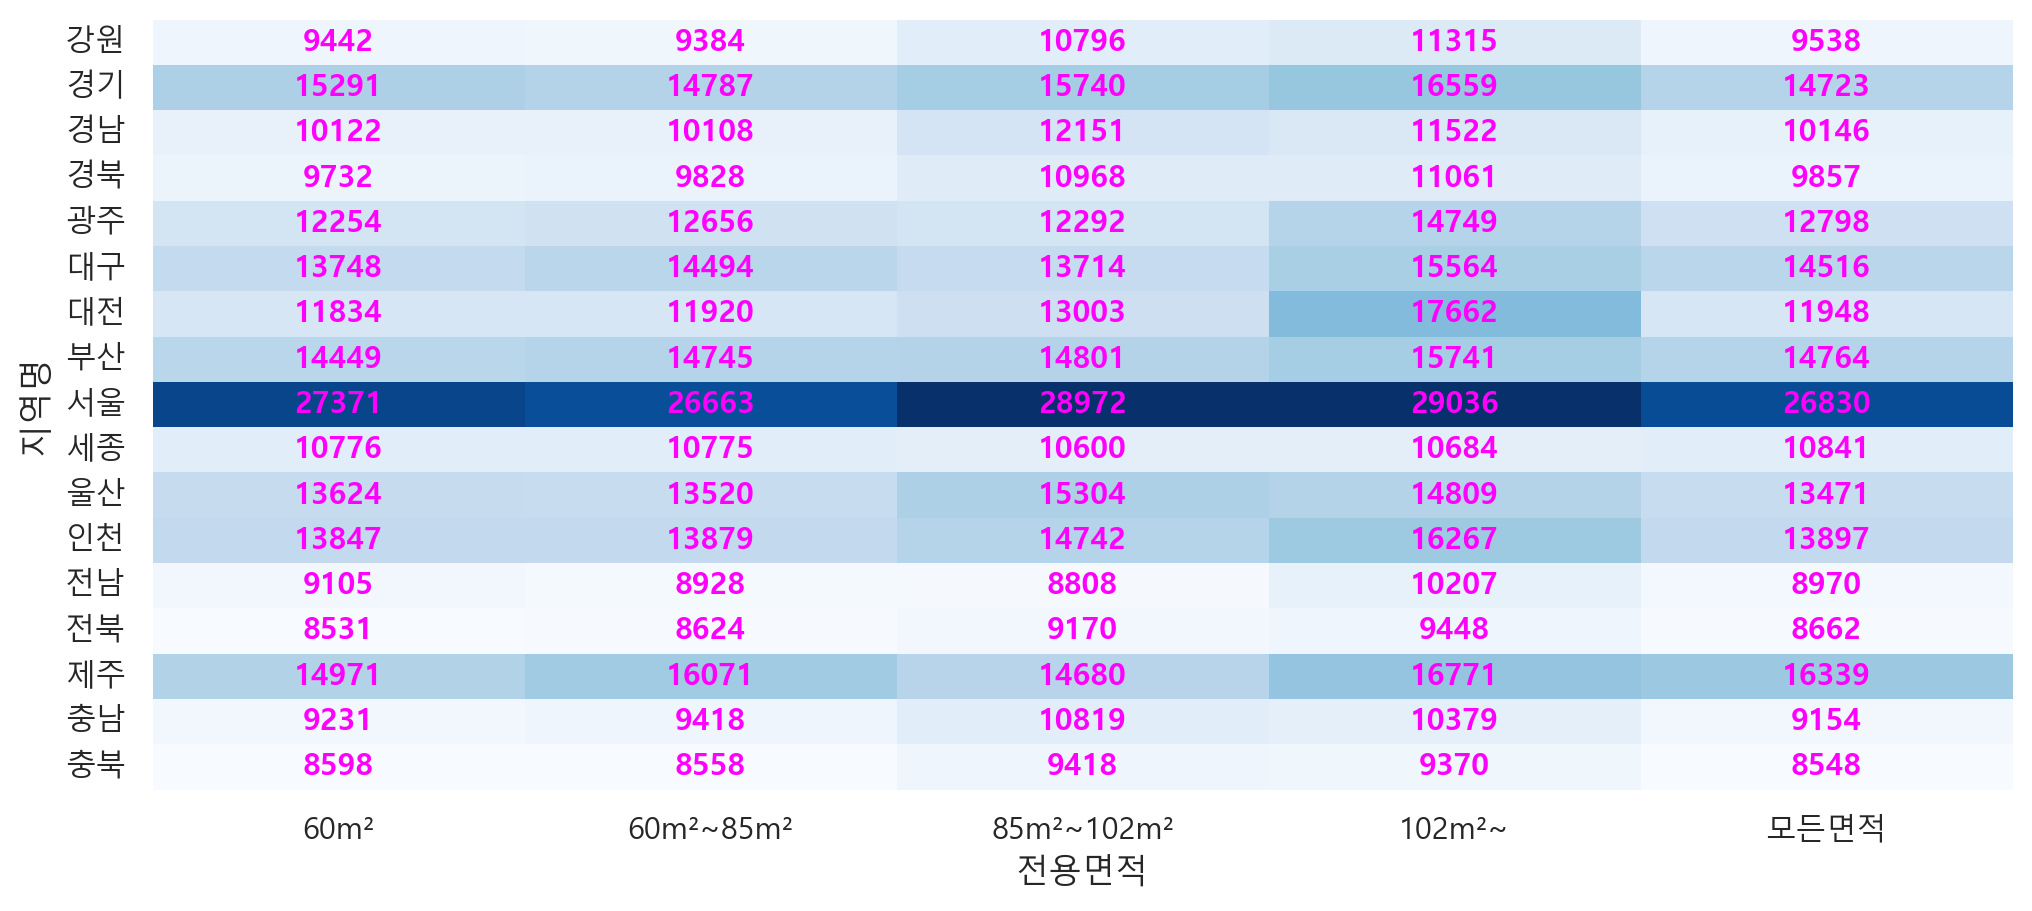

In [208]:
plt.figure(figsize=(12,5))
sns.heatmap(r, cmap='Blues', annot=True, fmt='.0f', cbar=False,
           annot_kws={'color':'magenta', 'size':11, 'weight':'bold'})
plt.show()

## (5) 연도, 지역별 평당분양가격(평균)

In [211]:
df_last.groupby(['연도', '지역명'])['평당분양가격'].mean().unstack().round(1)

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.1,11060.9,8459.2,7464.2,7916.7,9018.9,8190.6,10377.4,20315.7,8765.0,9367.6,10976.0,6798.9,7110.4,7951.1,7689.9,6828.8
2016,7162.9,11685.0,8496.7,7753.4,9190.7,10282.0,8910.7,10743.5,21753.4,8857.8,9582.6,11099.1,6936.6,6906.6,9567.5,7958.2,7133.3
2017,7318.8,12296.2,8806.6,8288.1,9599.7,12192.0,9912.9,11637.6,21864.1,9132.9,10630.2,11672.4,7413.2,7406.1,12628.5,8157.3,7462.6
2018,8219.3,14258.4,9327.7,8680.8,9527.0,12139.3,10234.1,12890.0,23202.2,10340.5,10241.4,11881.5,7929.8,8174.6,11936.0,8201.8,8149.3
2019,8934.5,15665.5,10697.6,9050.2,12111.7,14081.6,12619.2,13537.9,28286.8,11299.4,10216.2,13249.8,8219.3,8532.3,11828.5,8748.8,7970.9
2020,10302.4,15106.1,10919.3,9997.7,13406.5,15314.2,11238.8,13353.0,29781.0,11628.1,12837.6,14983.0,9562.4,8559.4,14192.9,9139.4,8359.0
2021,10291.3,14567.1,11302.3,11227.2,13709.8,15586.3,11994.2,14317.7,29380.4,12578.1,14192.0,15774.3,9980.8,9047.9,22302.3,9860.7,8822.4
2022,11644.2,16621.6,12455.7,12018.0,15095.9,16821.9,14113.9,18166.8,29128.5,11310.0,17903.8,17341.8,10635.5,10003.1,18953.8,11730.3,10033.5
2023,13409.4,20175.2,13283.2,13025.3,17957.9,17656.7,17917.3,20470.9,33230.6,12278.2,18832.1,16150.7,11846.7,10966.0,24095.9,12580.6,11104.0


In [215]:
df_last.pivot_table(index=['연도', '지역명'], values='평당분양가격').unstack().round(1)
r = df_last.pivot_table(index='연도', columns='지역명', values='평당분양가격').round(1)

In [216]:
r.loc[2024].head(1)

지역명
강원    15622.3
Name: 2024, dtype: float64

In [217]:
r['제주'].head(1)

연도
2015    7951.1
Name: 제주, dtype: float64

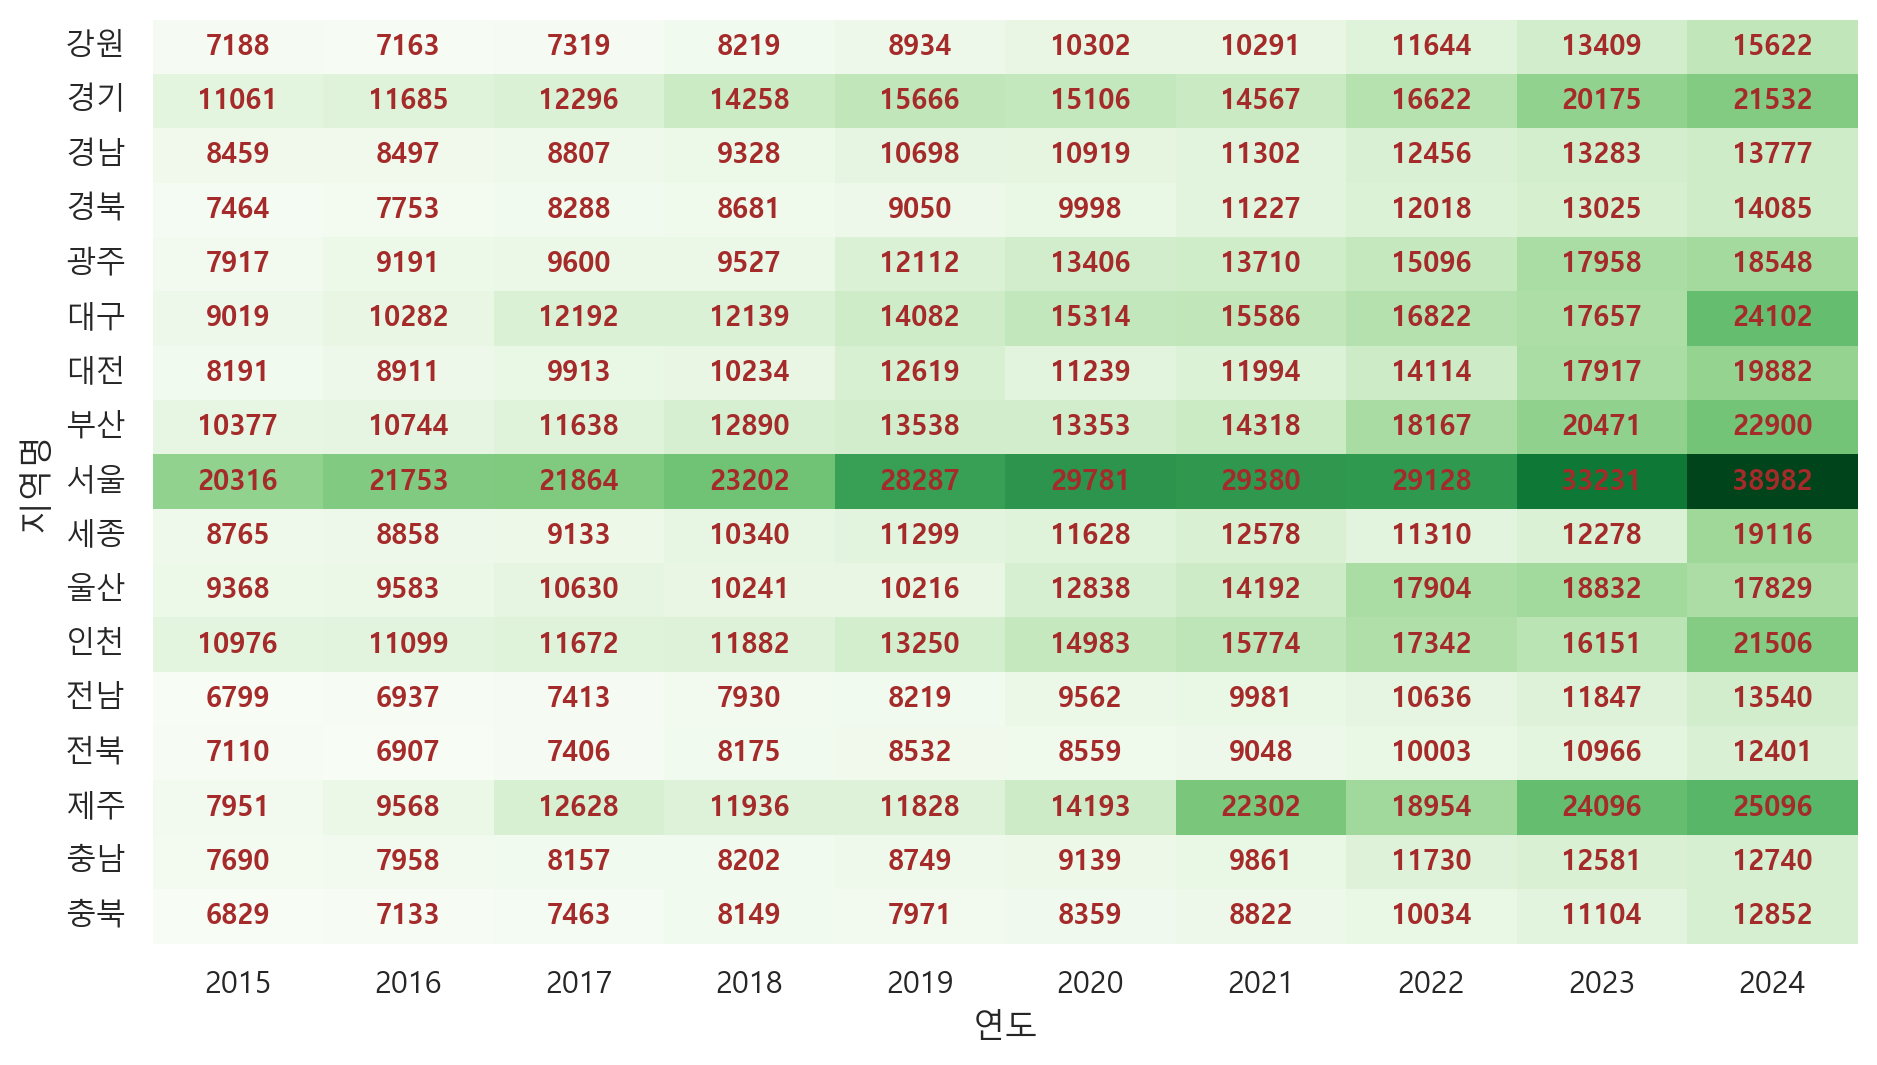

In [227]:
plt.figure(figsize=(11,6))
sns.heatmap(r.T, cmap='Greens', annot=True, fmt='.0f', cbar=False,
           annot_kws={'color':'Brown', 'size':10, 'weight':'bold'})
plt.show()

# 8. matplotlib으로 시각화(위의 도표)
https://www.research.autodesk.com/publications/same-stats-different-graphs/
## (1) 지역별 결측치를 제외한 데이터수(line, bar)

In [233]:
result = df_last.groupby('지역명')['평당분양가격'].count().sort_values()
result.min(), result.max()

(395, 535)

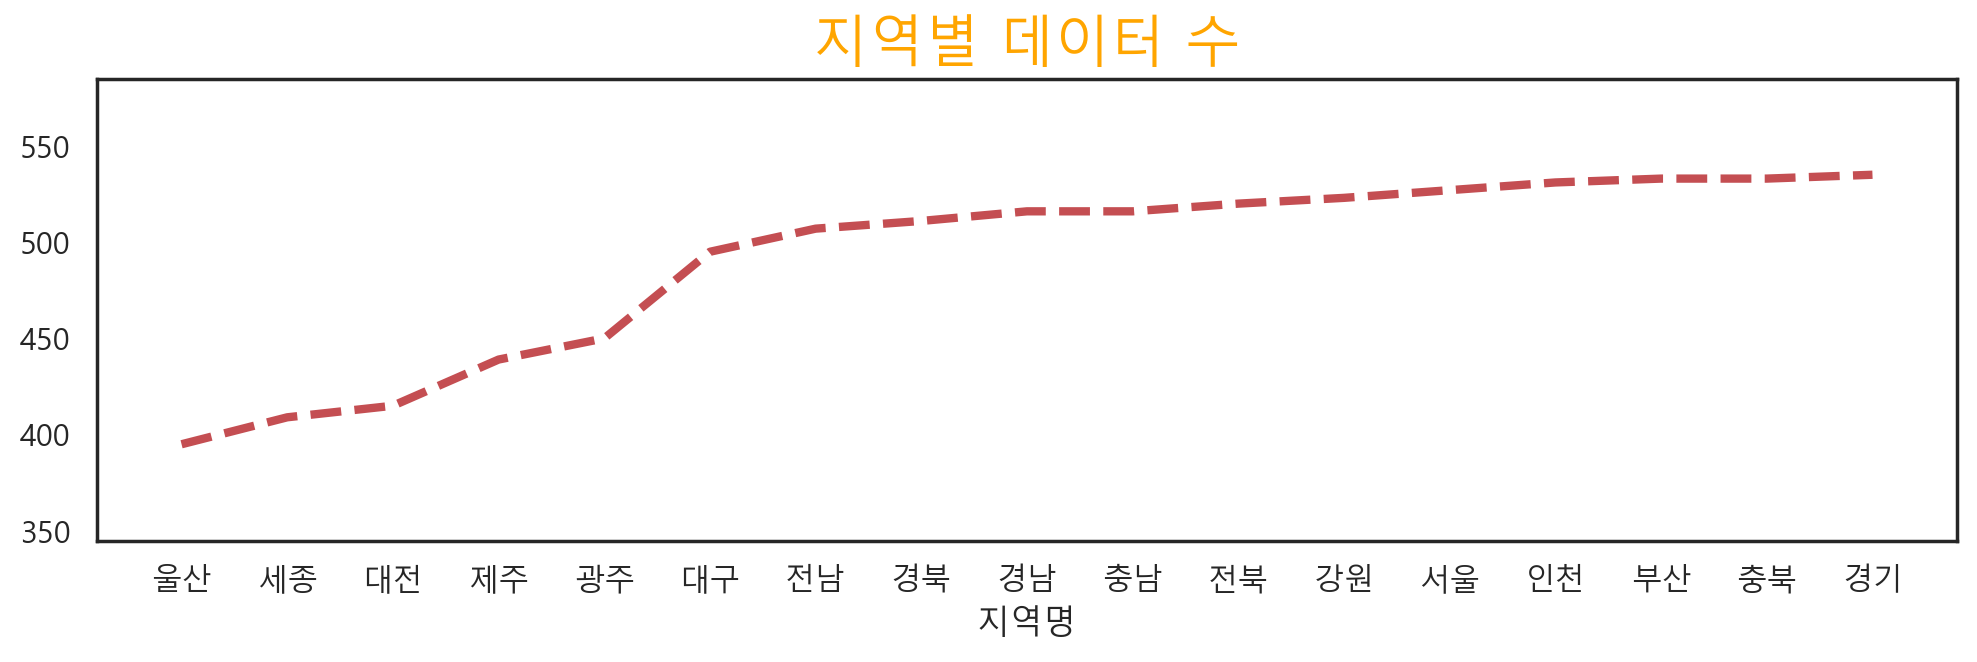

In [248]:
#result.plot.line()
#result.plot()
ax = result.plot(kind='line', color='r', linestyle='--', linewidth=3,
                 #title='지역별 데이터 수',
                 #ylim = [result.min() - 50, result.max() + 50],
                )
#plt.title('지역별 데이터 수', size=20, color='Orange')
ax.set_title('지역별 데이터 수', size=20, color='Orange')
ax.set_ylim([result.min() - 50, result.max() + 50])
ax.set_xticks(range(len(result)))
ax.set_xticklabels(result.index)
plt.show()

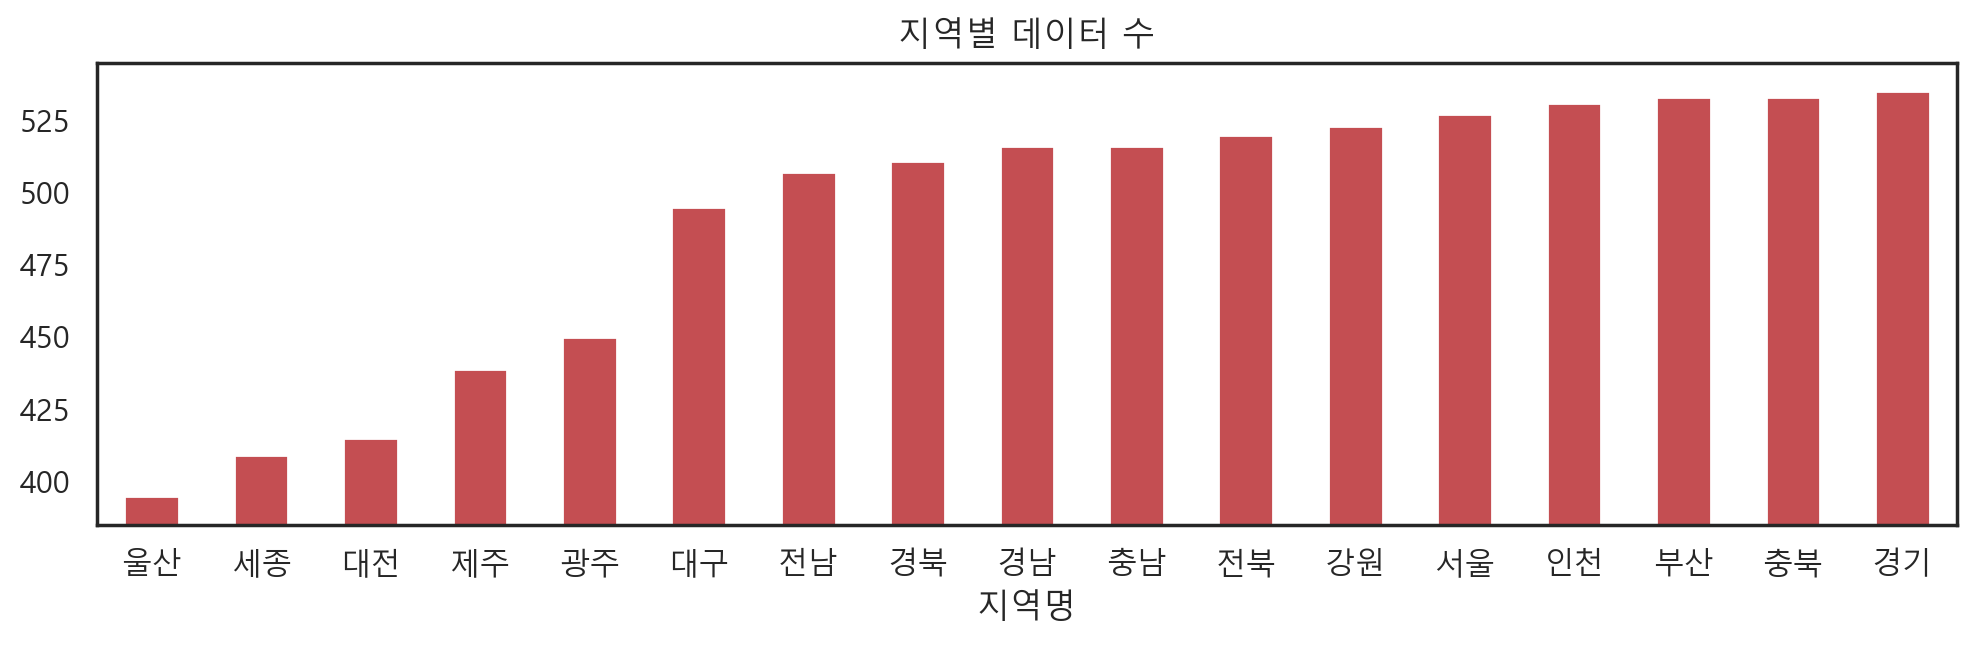

In [259]:
result.plot(kind='bar', color='r', rot=0,
            title='지역별 데이터 수',
            ylim = [result.min()-10, result.max() + 10],
           )
#result.set_ylim([result.min()-10, result.max() + 10])
plt.show()

## (2) 지역별 평당분양가격 (line, bar)

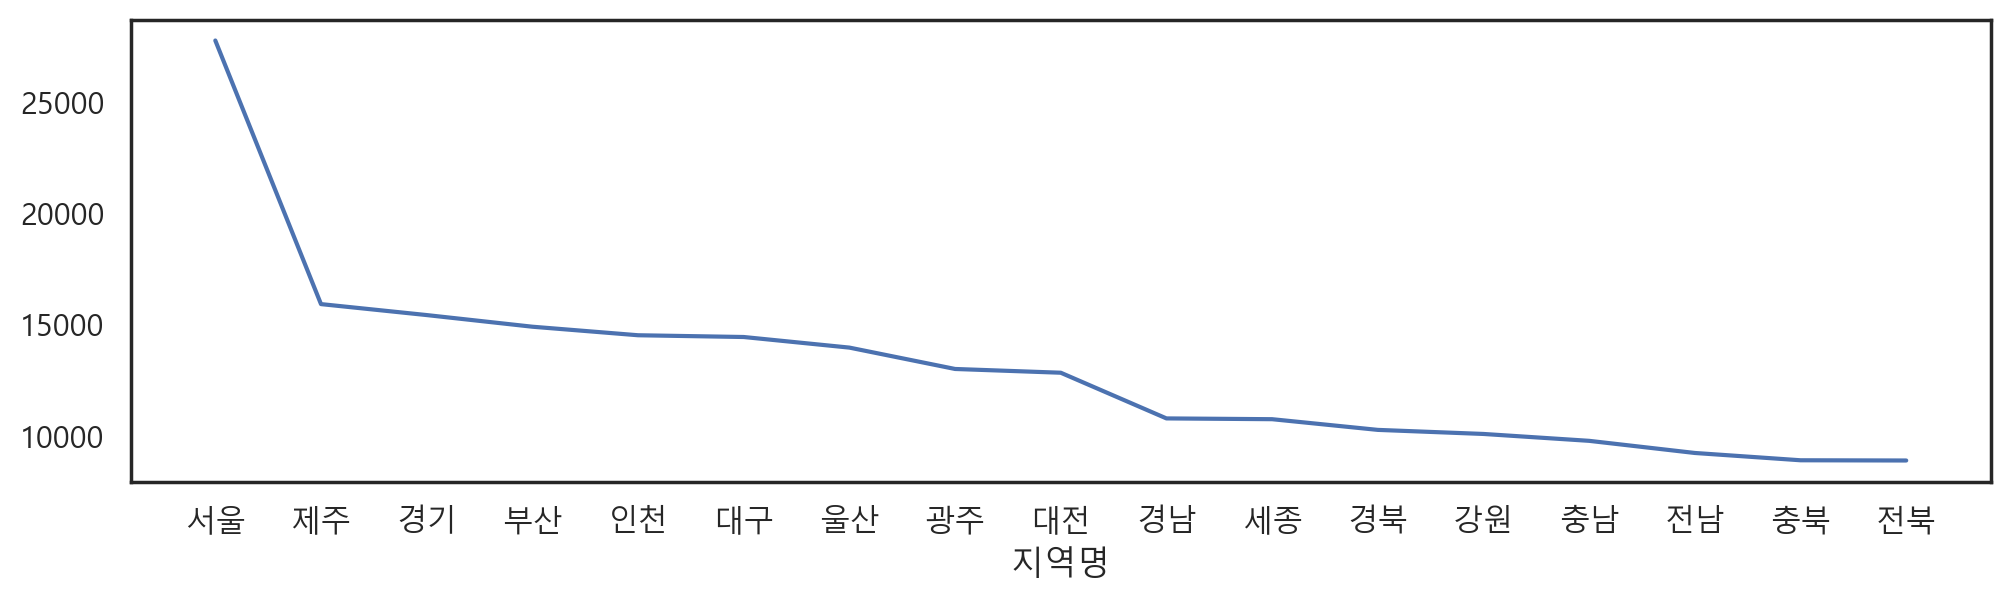

In [277]:
result = df_last.groupby('지역명')['평당분양가격'].mean().sort_values(
    ascending=False
)
ax = result.plot(kind='line')
ax.set_xticks(range(len(result)))
ax.set_xticklabels(result.index)
plt.show()

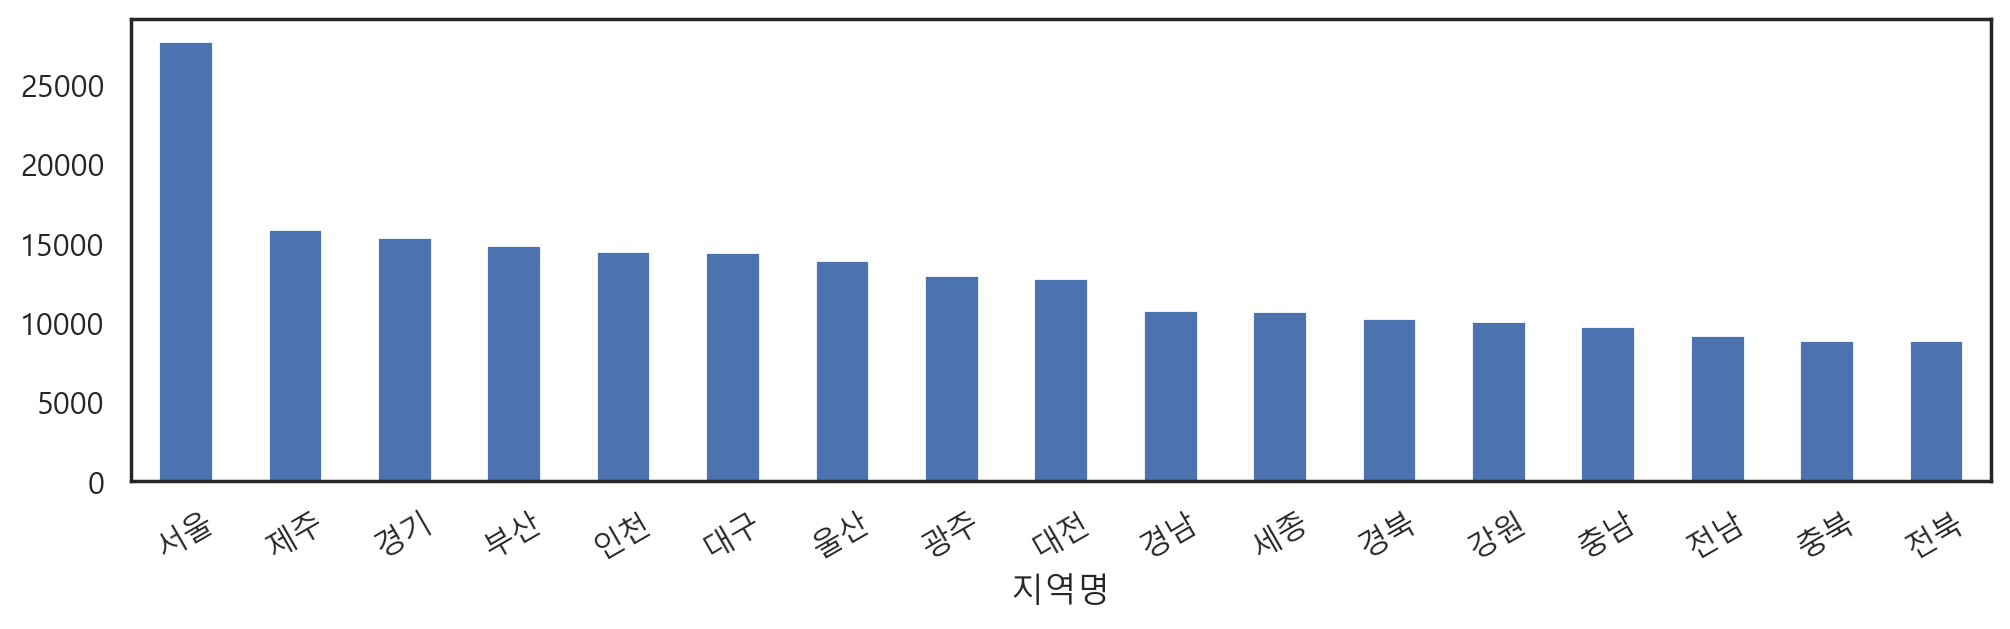

In [278]:
result.plot(kind='bar', rot=30)
plt.show()

## (3) 전용면적별 평당분양가격(barplot)

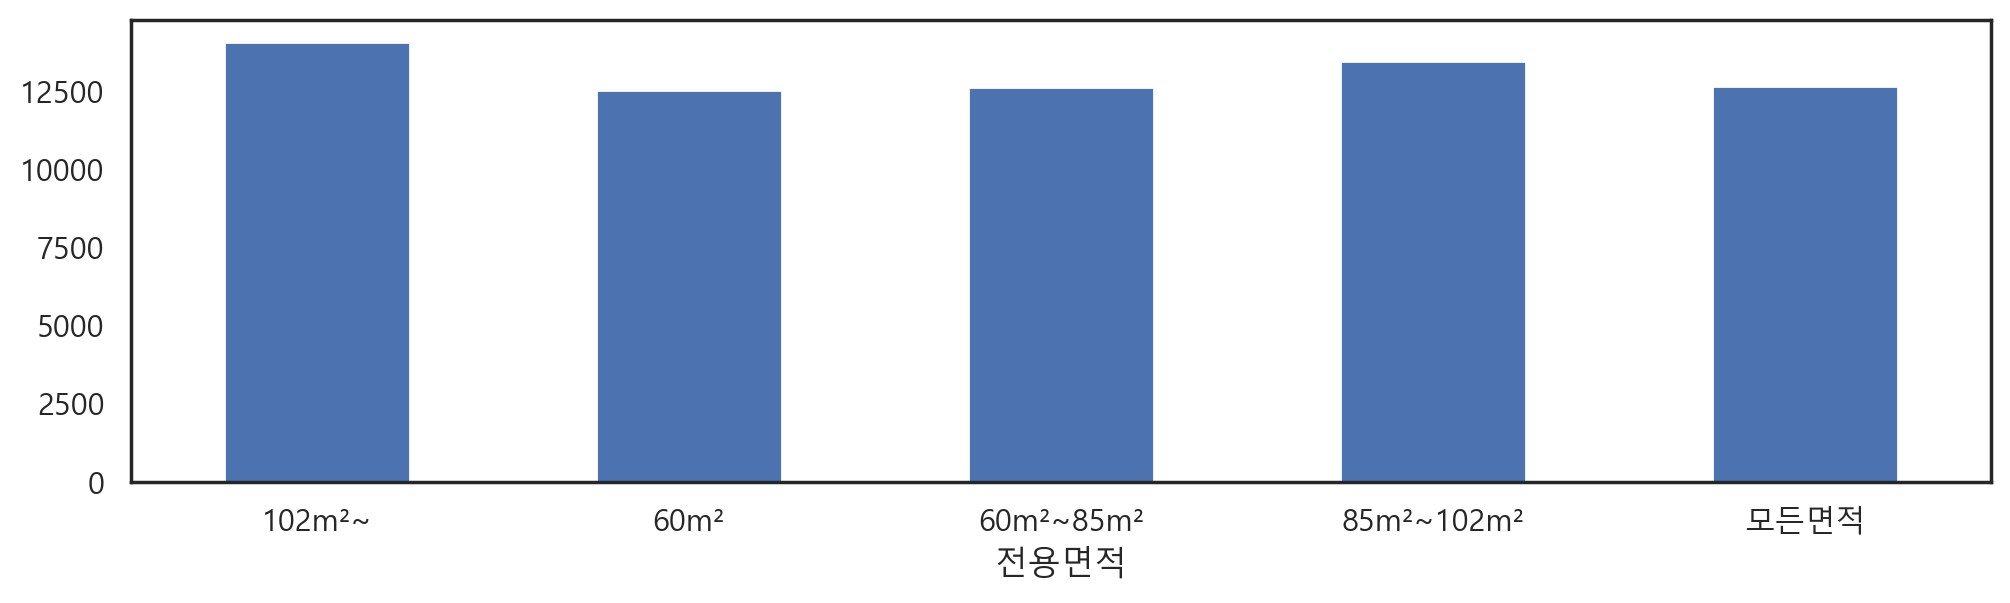

In [279]:
result = df_last.groupby('전용면적')['평당분양가격'].mean()
result.plot(kind='bar', rot=0)
plt.show()

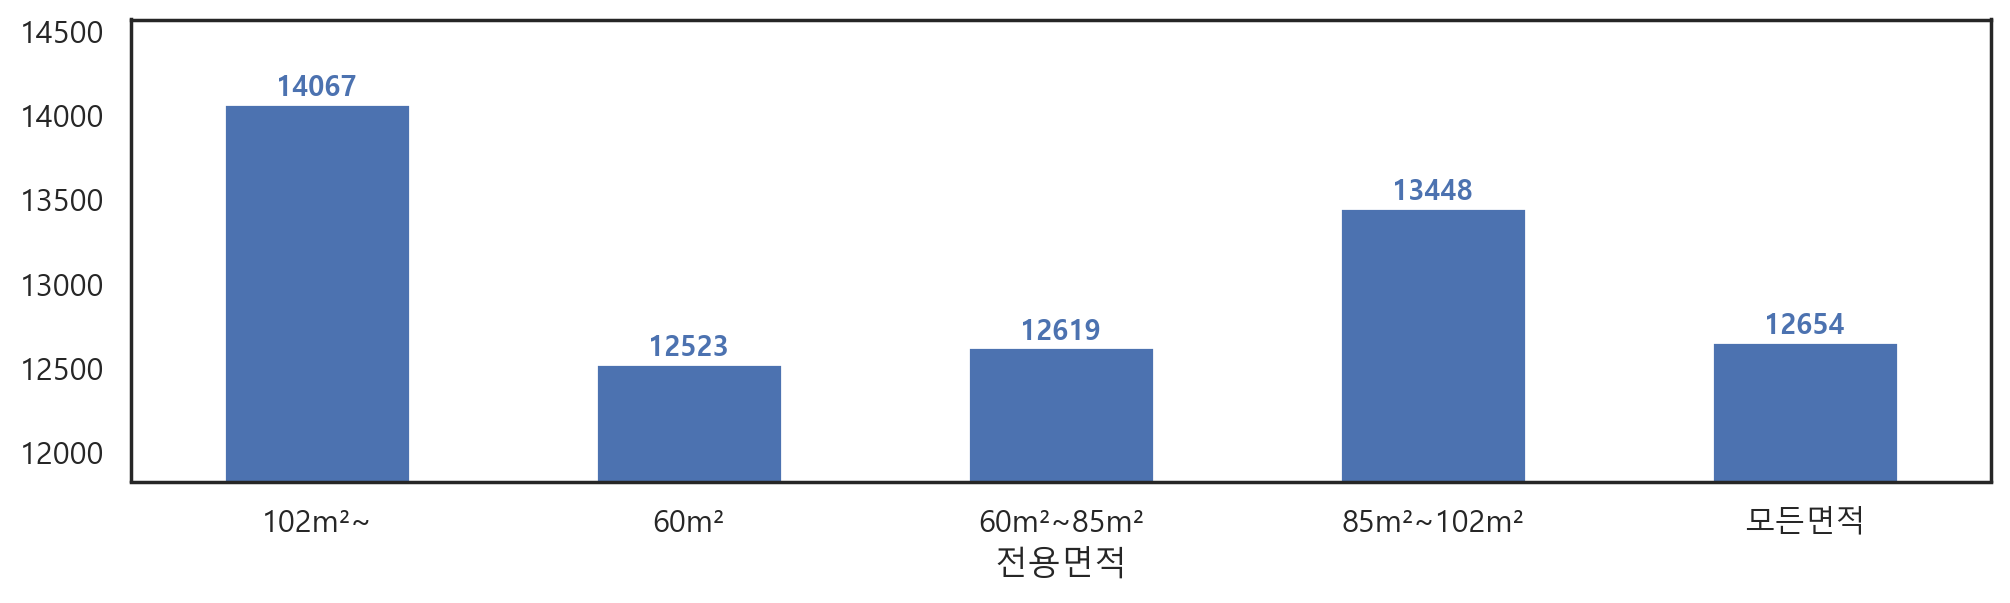

In [291]:
result.plot(kind='bar',
           rot=0,
           ylim=[result.min()-700, result.max()+500])
# plt.text(0-0.125, 14066+50, 14066)
# plt.text(1-0.125, 12522+50, 12522)
for i, val in enumerate(result):
    plt.text(i-0.11, val+50, #텍스트 들어갈 좌표
             round(val), color='b', fontsize=10, weight='bold')
#matplotlib, seaborn 모두 함수 내 인수로 자동적으로 value 표시해 주는 기능이 없음
plt.show()

## (4) 연도별 평균 평당분양가격(line, bar)

In [295]:
result = df_last.groupby('연도')['평당분양가격'].mean()
print('result: ', result)
print('x축: ', result.index) #index 정수 타입 확인
print('y축: ', [round(r, 1) for r in result])

result:  연도
2015     9202.735802
2016     9683.025000
2017    10372.928923
2018    10978.938411
2019    12188.293092
2020    13039.422449
2021    13636.022540
2022    14942.504494
2023    16890.920657
2024    18962.919231
Name: 평당분양가격, dtype: float64
x축:  Int64Index([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype='int64', name='연도')
y축:  [9202.7, 9683.0, 10372.9, 10978.9, 12188.3, 13039.4, 13636.0, 14942.5, 16890.9, 18962.9]


In [296]:
for key, val in result.items():
    print(key, val)

2015 9202.735802469135
2016 9683.025
2017 10372.928923076923
2018 10978.938411316649
2019 12188.293092105261
2020 13039.42244897959
2021 13636.022539682539
2022 14942.504494382021
2023 16890.92065677966
2024 18962.91923076923


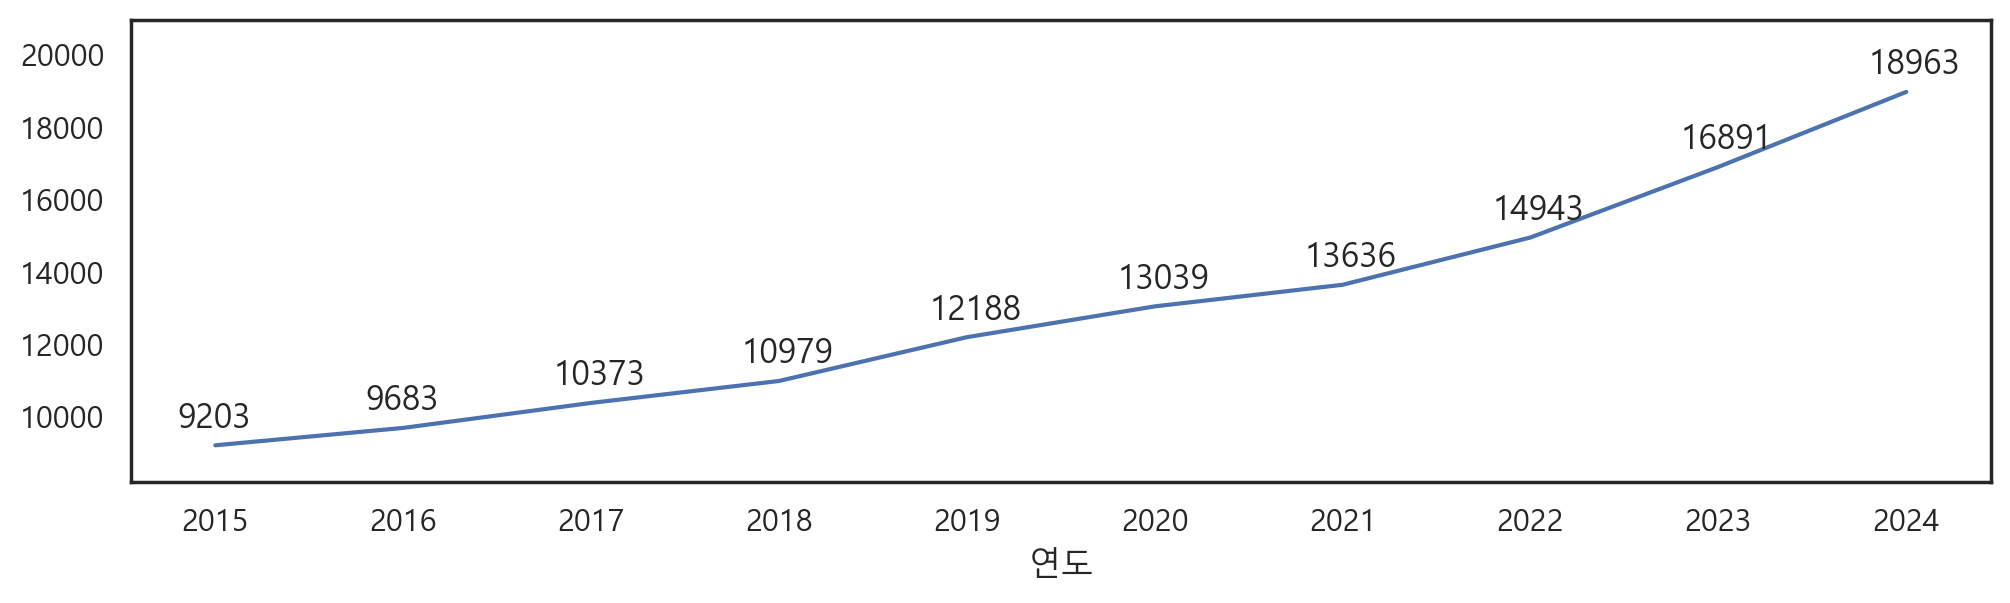

In [302]:
result.plot(kind='line', 
            xticks=range(2015,2025), 
            ylim=[result.min()-1000, result.max()+2000])
#plt.text(2015-0.1, 15000, 'sample')
for year, val in result.items():
    plt.text(year-0.2, val+500, round(val))

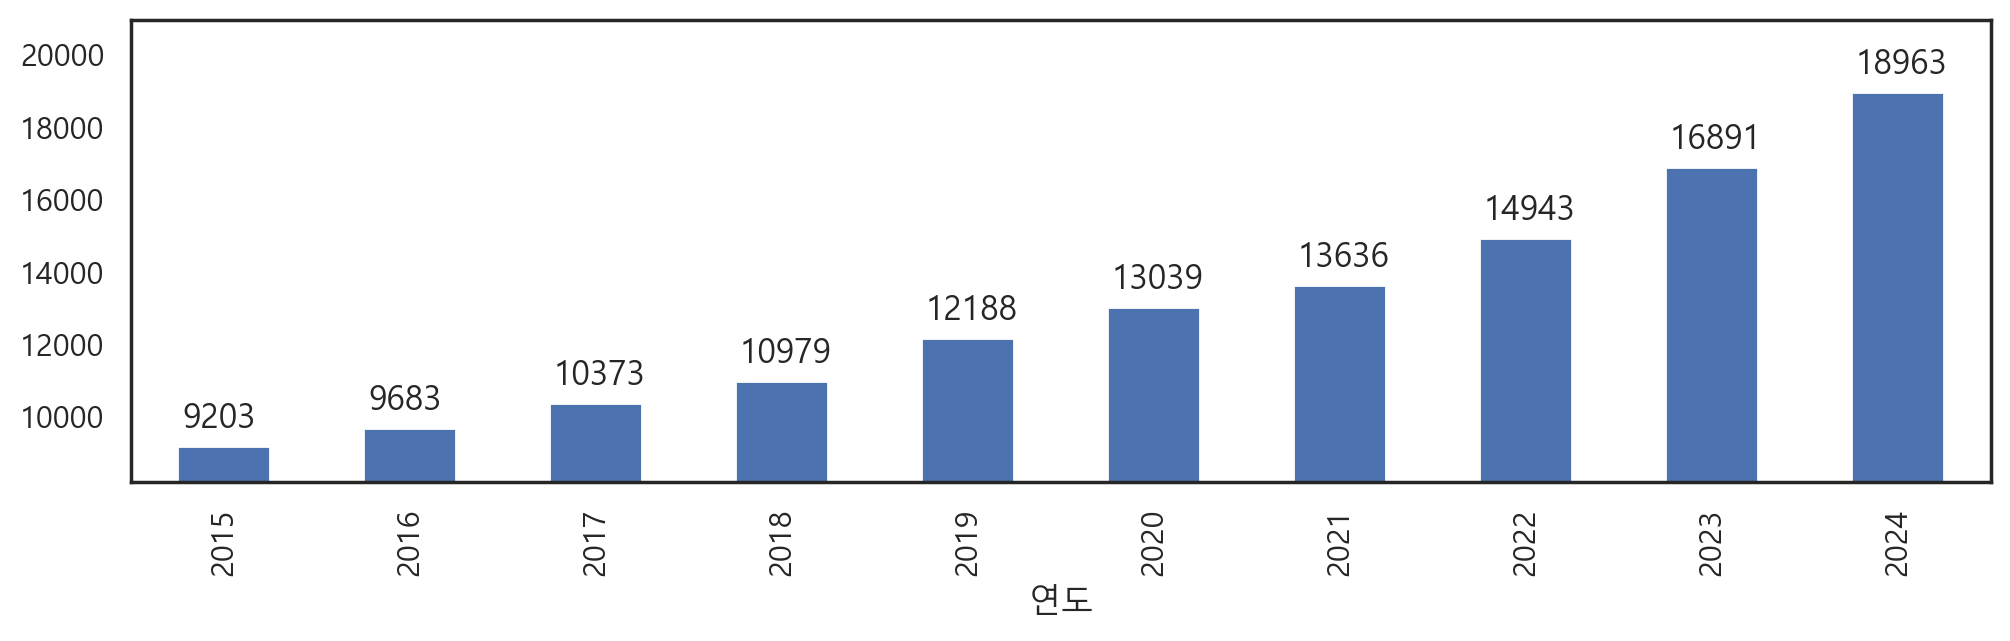

In [308]:
result.plot(kind='bar', 
            ylim=[result.min()-1000, result.max()+2000])
#plt.text(2015-0.1, 15000, 'sample')
for i, val in enumerate(result):
    plt.text(i-0.225, val+500, round(val))

In [309]:
# 연도와 평당분양가격의 상관관계
df_last[['연도', '평당분양가격']].corr()

,연도,평당분양가격
연도,1.000000,0.472675
평당분양가격,0.472675,1.000000


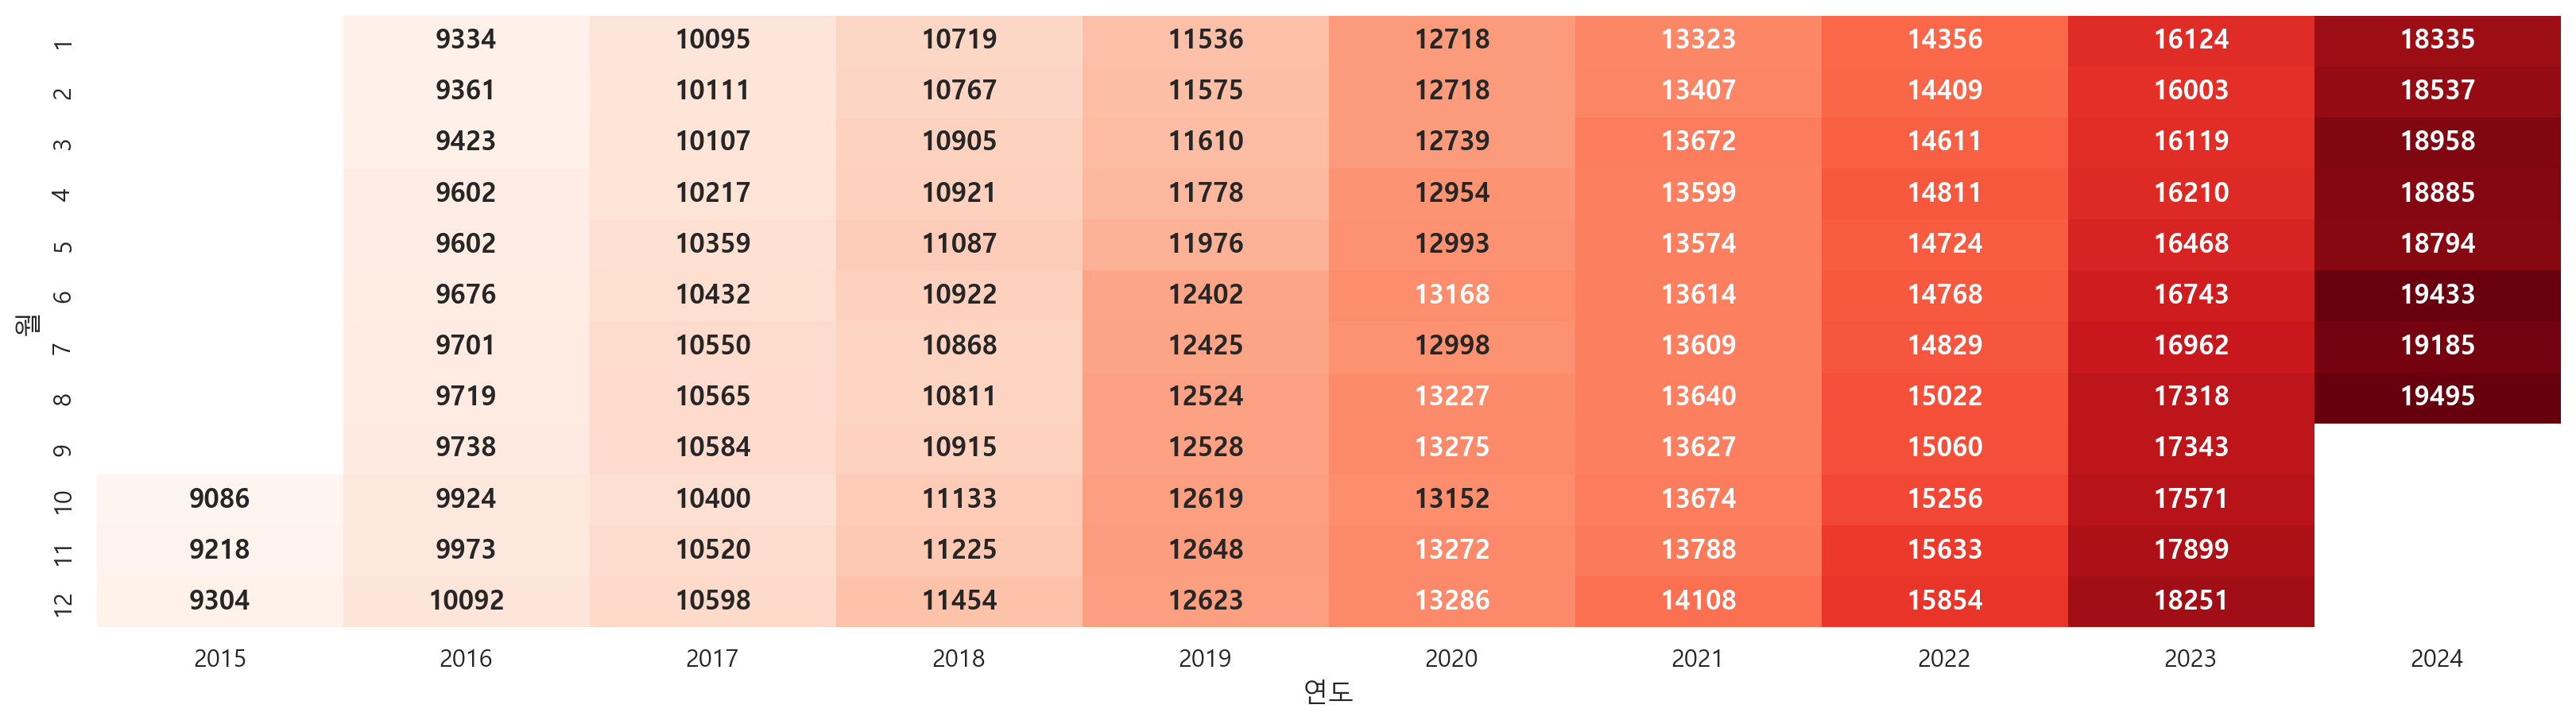

In [318]:
df_last.groupby(['월', '연도'])['평당분양가격'].mean().unstack()
r = df_last.pivot_table(index='월', columns='연도', values='평당분양가격')
plt.figure(figsize=(20,5))
sns.heatmap(r, cmap='Reds', annot = True, fmt='.0f', cbar=False, annot_kws={'weight':'bold'})
plt.show()

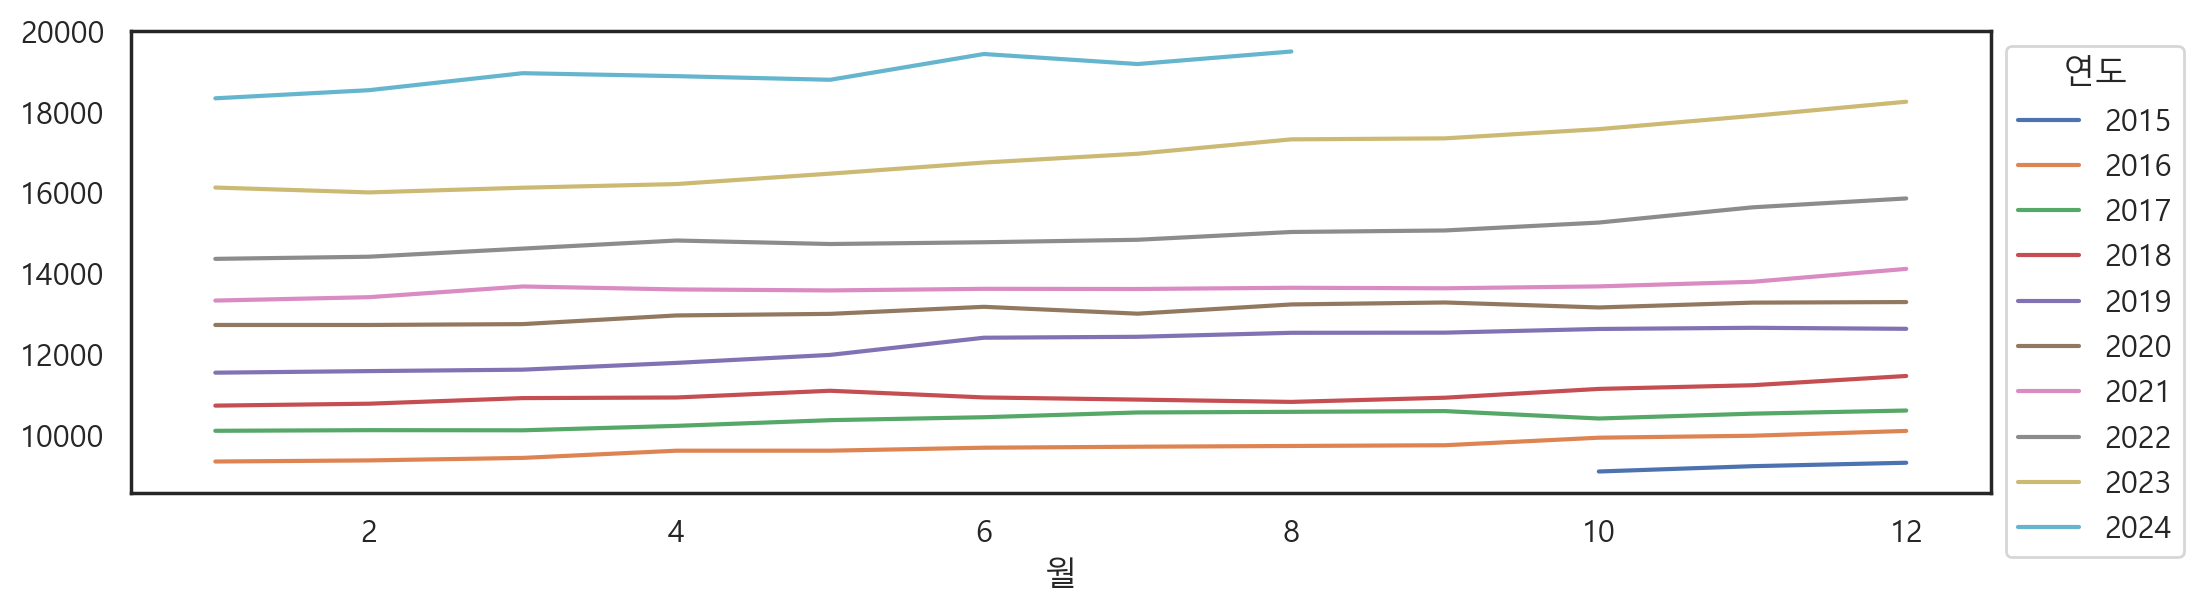

In [322]:
ax = r.plot(#kind='line'
    )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

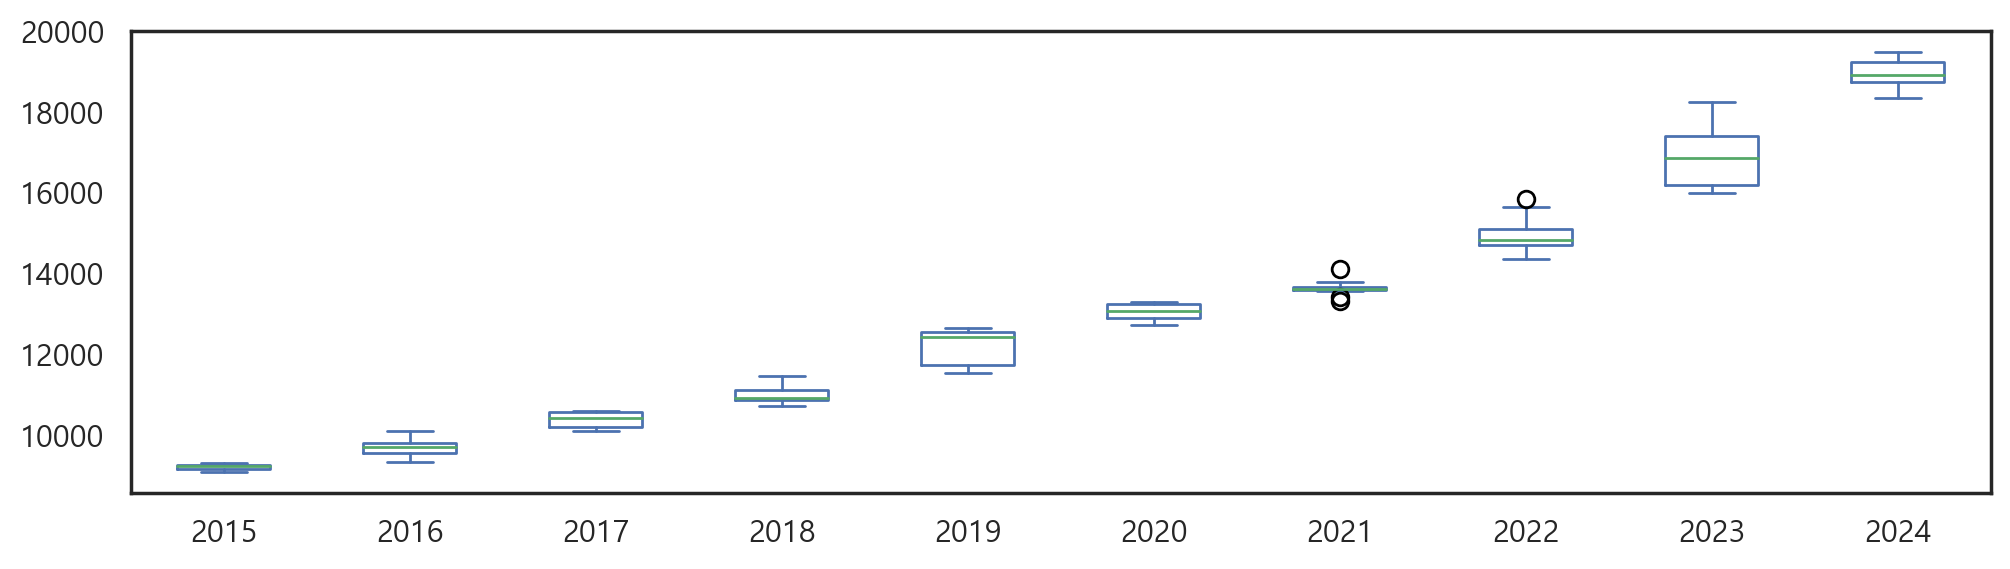

In [323]:
r.plot(kind='box')
plt.show()

범례:https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

# 9. seaborn으로 시각화
- 위에서 시각화한 내용을 seaborn으로 시각화

## (1) 지역별 평당분양가격

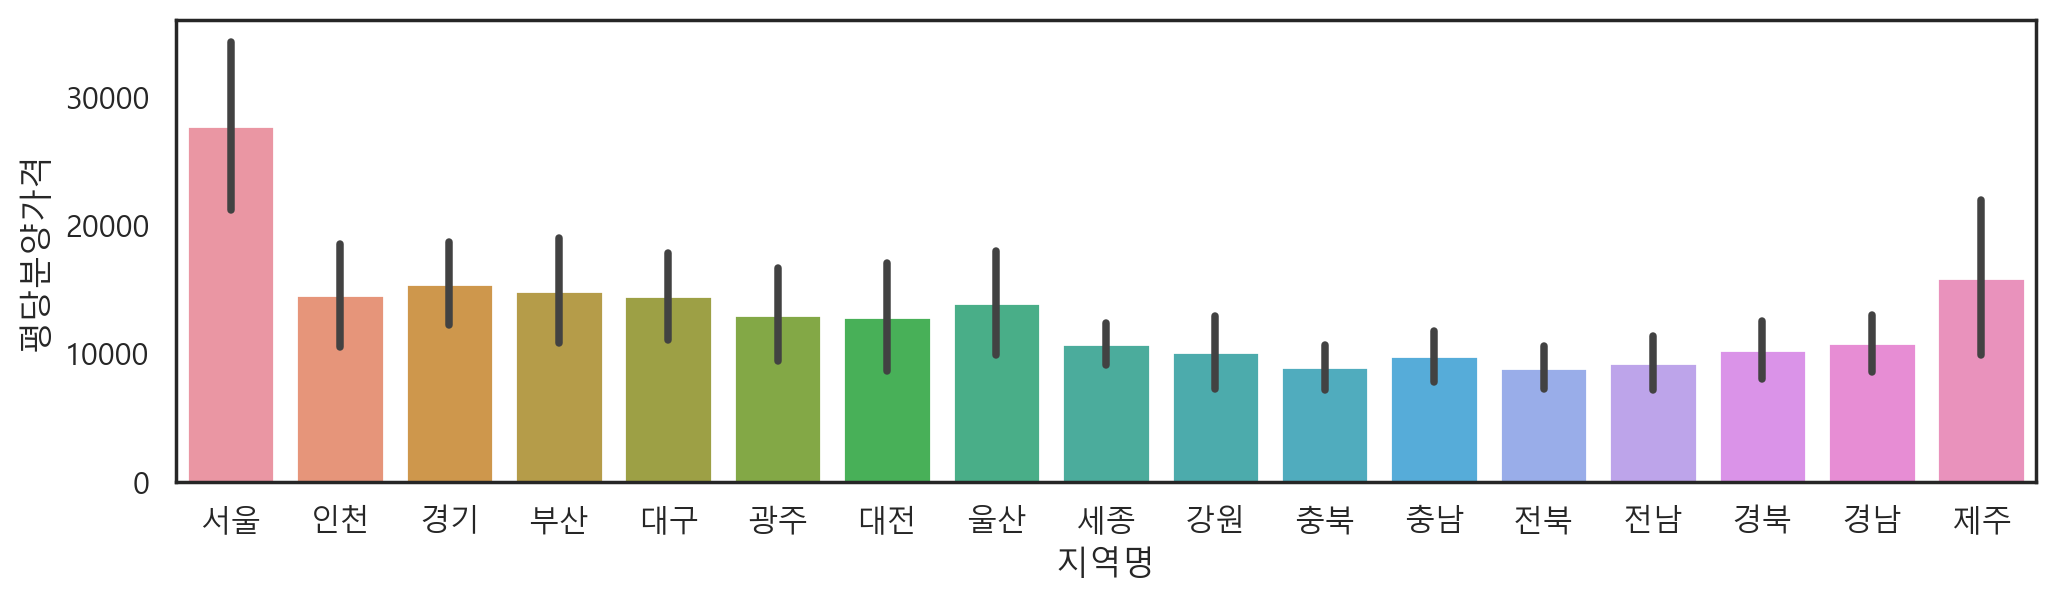

In [325]:
sns.barplot(data=df_last, x='지역명', y='평당분양가격',
            #errorbar = None
            #errorbar=('ci', 95) #기본값(95% 신뢰구간의 평균)
            errorbar='sd'
           )
plt.show()

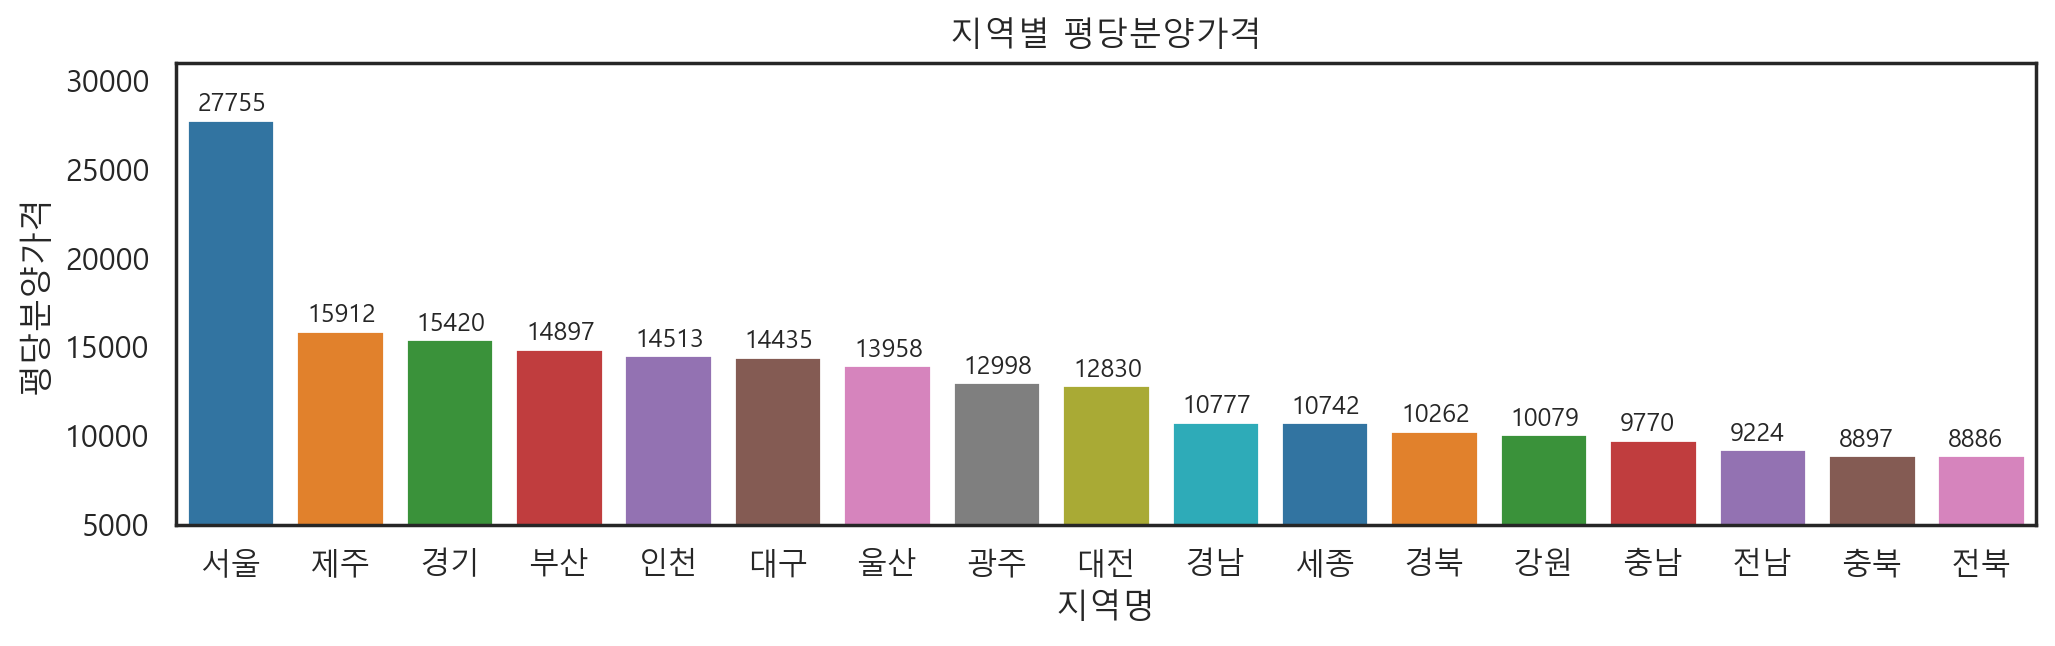

In [345]:
# 정렬된 순서로 시각화
result = df_last.groupby('지역명')['평당분양가격'].mean().sort_values(ascending=False)
ax = sns.barplot(data=df_last, x='지역명', y='평당분양가격',
                 errorbar = None,
                 order = result.index,
                 palette='tab10'
                )
ax.set_title('지역별 평당분양가격')
ax.set_ylim([5000,31000])
for i, val in enumerate(result):
    ax.text(i-0.3, val+500, round(val), fontsize=9)

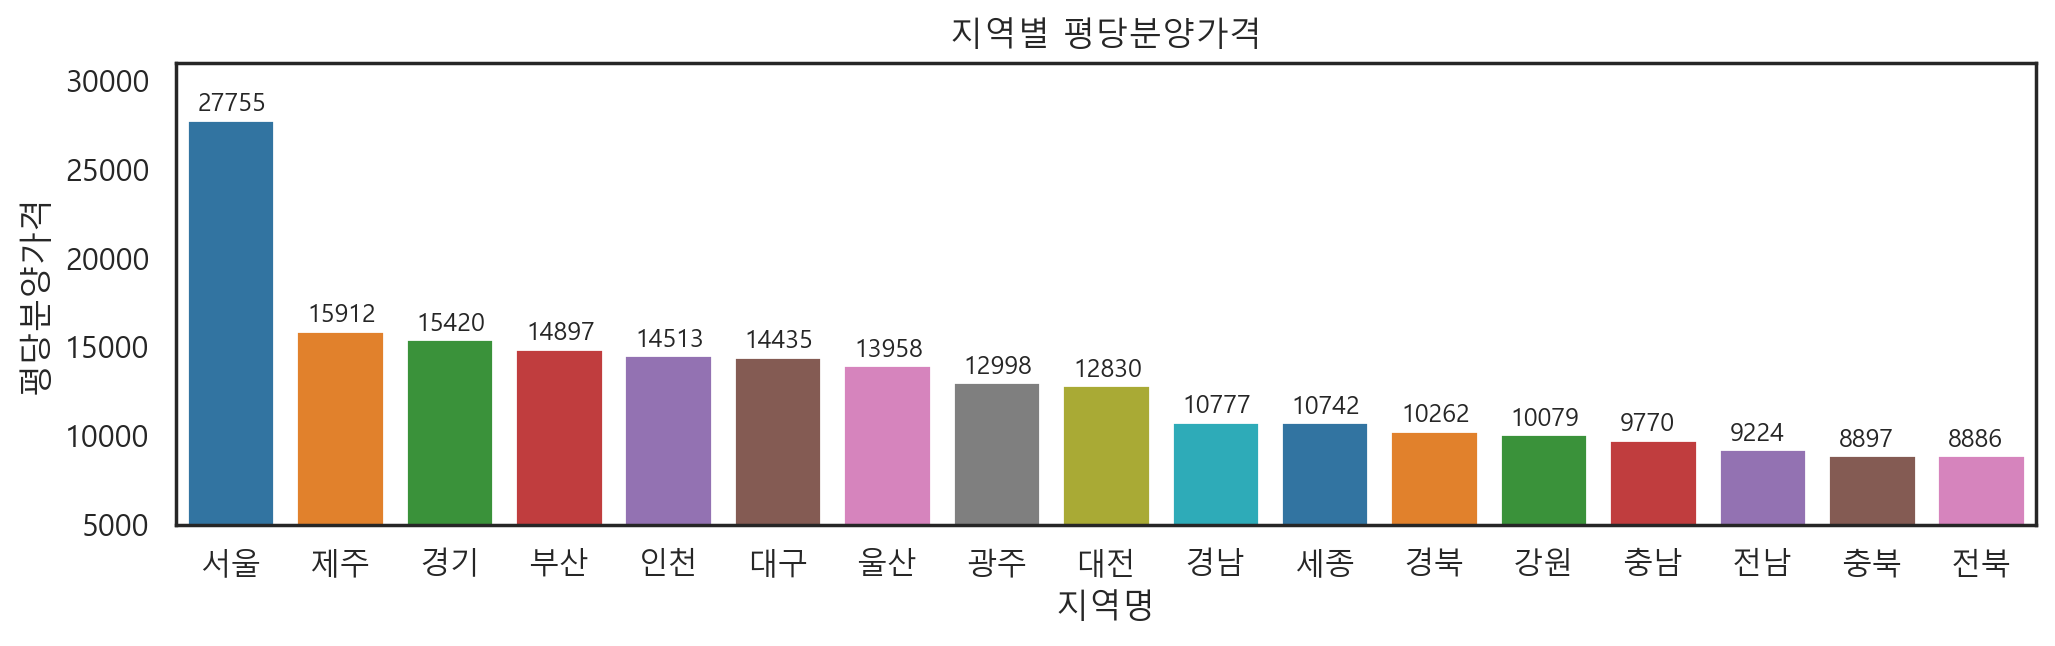

In [346]:
ax = sns.barplot(x=result.index, y=result,
                 errorbar = None,
                 order = result.index,
                 palette='tab10'
                )
ax.set_title('지역별 평당분양가격')
ax.set_ylim([5000,31000])
for i, val in enumerate(result):
    ax.text(i-0.3, val+500, round(val), fontsize=9)

## (2) 연도별 평당분양가격

## (3) 그 외 lineplot, relplot, boxplot, violinplot, boxexplot, regplot, swarmplot

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot : 범례사용(교안 20page)

# 10. 구조가 다른 df_first와 df_last를 연결 후 분석
## (1) concat
- new_first :df_first를 [지역명, 연도, 월, 평당분양가격]으로 변환
- new_last : df_last를 [지역명, 연도, 월, 평당분양가격]으로 변환
                (전용면적이 모든면적인 행만 추출후, 전용면적 열을 삭제)

## (2) 결측치 대체(연도별, 지역별 중위값)

## (3) df.csv파일로 출력

## (4) 7절부터 9절까지 분석을 한다(전용면적별 분석은 불가)

- 지역명별 데이터 갯수는 결측치가 없어서 동일(groupby나 pivot_table등으로 확인)
- 지역명별 평당분양가격(groupby, pivot_table, plot, seaborn 연습)
- 연도별 지역명별 평당분양가격(groupby, pivot_table, plot, seaborn 연습)

### ① 지역명별 데이터 행 갯수 : 결과가 1차원 시리즈

### ② 지역별 평당분양가격(평균, 최대값, ... 요약통계량)

In [ ]:
# 지역명당 평당분양가격 시각화(lineplot과 matplotlib의 bar, sns의 barplot)

### ③ 연도별 평당분양가격(평균)

In [ ]:
# 연도별 평당분양가격 시각화(lineplot과 matplotlib의 bar, sns의 barplot)

### ④ 연도, 지역별 평당분양가격(평균)

In [ ]:
# 연도별, 지역별 평당분양가격 시각화(heatmap)

In [ ]:
# 년도별 평균 평당분양가격의 추이

In [ ]:
# 위의 그래프가 겹쳐서 작 보이지 않아 분리

In [ ]:
# 관계형 그래프의 서브플롯을 그리는 함수는 relplot
# 범주형 그래프의 서브플롯을 그리는 함수는 catplot

In [ ]:
# 연도별 평당분양가격의 사분위수


In [ ]:
# 연도별 평당분양가격의 사분위수(분포포함 boxenplot)


In [ ]:
# 연도별 평당분양가격의 사분위수(분포포함 violinplot)


In [ ]:
# 연도에 따른 평당분양가격을 회귀식으로 시각화


In [ ]:
# swarmplot은 많은 데이터를 그리기에는 시간이 많이 걸려 5%만 sampling후 그릴 것을 추천
# 연도별 평당분양가격 산점도
 

In [ ]:
# 분양가격을 hist
